In [2]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
problem = driver.run()
hamiltonian = problem.hamiltonian
print(hamiltonian)


In [3]:
import numpy as np 
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.properties import ElectronicDipoleMoment


dipole: ElectronicDipoleMoment = problem.properties.electronic_dipole_moment

if dipole is not None:
    nuclear_dip = dipole.nuclear_dipole_moment
    # Cập nhật moment lưỡng cực cho các thành phần x, y, z
    dipole.x_dipole.alpha += PolynomialTensor({"": nuclear_dip[0]})
    dipole.y_dipole.alpha += PolynomialTensor({"": nuclear_dip[1]})
    dipole.z_dipole.alpha += PolynomialTensor({"": nuclear_dip[2]})
    print("Đã thêm moment lưỡng cực vào Hamiltonian.")
else:
    print("Moment lưỡng cực không tồn tại trong problem.")

# Kiểm tra coefficients của Hamiltonian
coefficients = hamiltonian.electronic_integrals
print("Coefficients của Hamiltonian:", coefficients.alpha)
print("Các thành phần x, y, z của moment lưỡng cực:", dipole)

Đã thêm moment lưỡng cực vào Hamiltonian.
Coefficients của Hamiltonian: Polynomial Tensor
 "+-":
array([[-1.25633907e+00, -1.37083854e-17],
       [-6.07732712e-17, -4.71896007e-01]])
 "++--":
array([6.75710155e-01, 1.39486891e-16, 1.80931200e-01, 6.64581730e-01,
       2.57172666e-16, 6.98573723e-01])
Các thành phần x, y, z của moment lưỡng cực: <qiskit_nature.second_q.properties.dipole_moment.ElectronicDipoleMoment object at 0x7f8b1f237250>


In [4]:
print("Moment lưỡng cực trước khi cập nhật:", dipole.nuclear_dipole_moment)
print("Moment lưỡng cực sau khi cập nhật:", dipole.x_dipole.alpha, dipole.y_dipole.alpha, dipole.z_dipole.alpha)


Moment lưỡng cực trước khi cập nhật: [0.        0.        1.3889487]
Moment lưỡng cực sau khi cập nhật: Polynomial Tensor
 "+-":
array([[0., 0.],
       [0., 0.]])
 "":
array(0.) Polynomial Tensor
 "+-":
array([[0., 0.],
       [0., 0.]])
 "":
array(0.) Polynomial Tensor
 "+-":
array([[ 0.69447435, -0.92783347],
       [-0.92783347,  0.69447435]])
 "":
array(1.3889487)


In [5]:
second_q_op = hamiltonian.second_q_op()
print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.33229086512764816 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.33229086512764816 * ( +_0 +_3 -_3 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.0904655998921157 * ( +_0 +_1 -_0 -_1 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.0904655998921157 * ( +_0 +_3 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.0904655998921157 * ( +_1 +_1 -_0 -_0 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.0904655998921157 * ( +_1 +_3 -_2 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.33229086512764816 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.33229086512764816 * ( +_2 +_3 -_3 -_2 )
+ 0.0904655998921157 * ( +_2 +_0 -_1 -_3 )
+ 0.0904655998921157 * ( +

In [6]:
from qiskit_nature.second_q.mappers import JordanWignerMapper

mapper = JordanWignerMapper()
qubit_p_op = mapper.map(second_q_op)
print(qubit_p_op)


SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.12091263+0.j,
  0.17218393+0.j,  0.16892754+0.j, -0.22575349+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


In [7]:
from qiskit_nature.second_q.circuit.library import HartreeFock, UCC

ansatz = UCC(
    num_spatial_orbitals=2,
    num_particles=[1,1],
    excitations='sd',
    qubit_mapper=mapper,
    initial_state=HartreeFock(
        num_spatial_orbitals=2,
        num_particles=[1,1],
        qubit_mapper=mapper,
    ),
    reps=1,

)

In [8]:
from qiskit import *
from qiskit_algorithms.optimizers import COBYLA , SLSQP, L_BFGS_B, SPSA, NELDER_MEAD
from qiskit_algorithms import VQE
#from qiskit.utils import QuantumInstance
from qiskit.primitives import Estimator

optimizer = SLSQP(maxiter=200)

estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)
res = vqe.compute_minimum_eigenvalue(qubit_p_op)

In [15]:
import numpy as np


# we will iterate over these different optimizers
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    #algorithm_globals.random_seed = 50
    #ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")

    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    res = vqe.compute_minimum_eigenvalue(qubit_p_op)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

Optimizer: SLSQP           

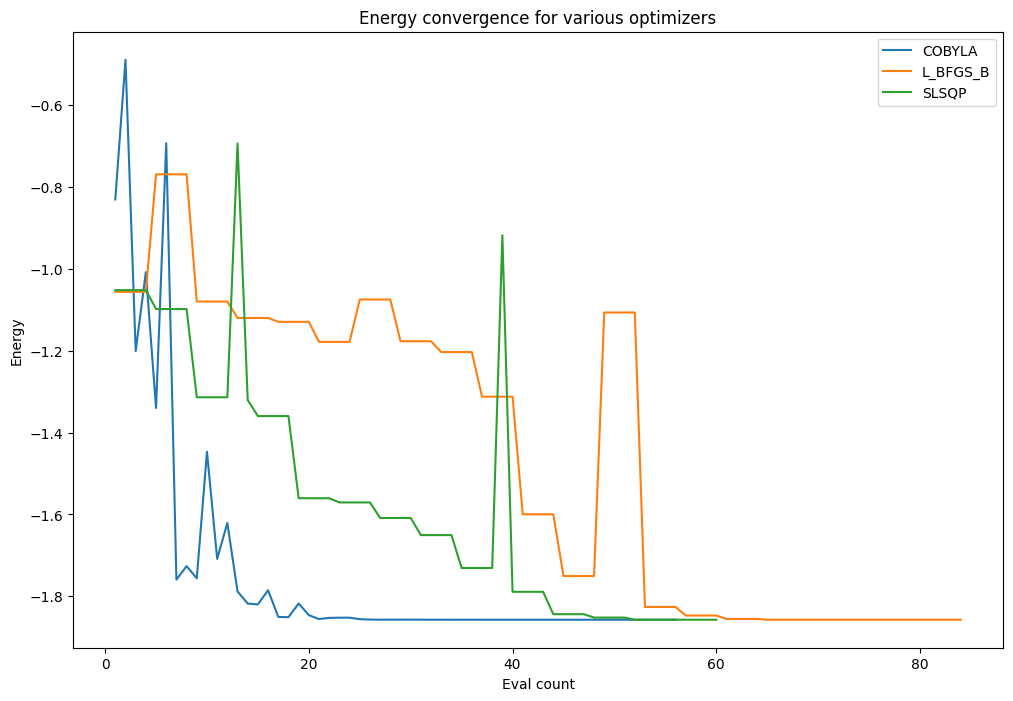

In [16]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right")

In [9]:
from qiskit_algorithms.eigensolvers import NumPyEigensolver

numpy_solver = NumPyEigensolver()
exact_result = numpy_solver.compute_eigenvalues(qubit_p_op)
ref_value = exact_result.eigenvalues[0].real
print(f"Reference value: {ref_value}")
print(f"VQE values: {res.eigenvalue.real}")
print(f"Delta from reference energy value is {(res.eigenvalue.real - ref_value)}")

Reference value: -1.8572750302023806
VQE values: -1.8572750176525419
Delta from reference energy value is 1.2549838723785456e-08


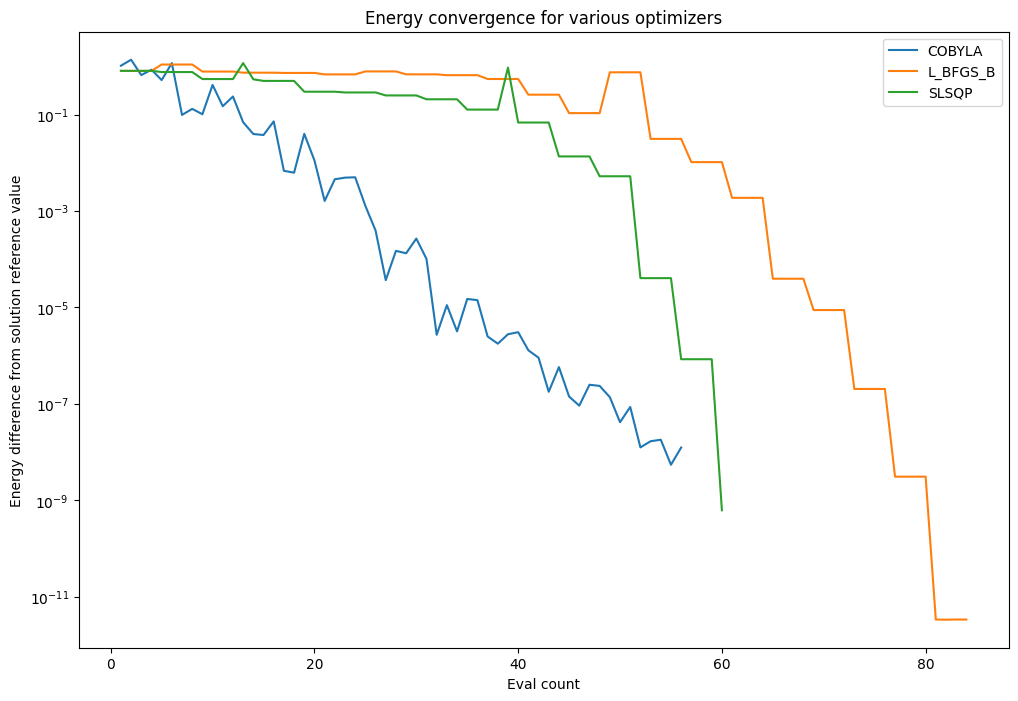

In [44]:
pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(
        converge_counts[i],
        abs(ref_value - converge_vals[i]),
        label=type(optimizer).__name__,
    )
pylab.xlabel("Eval count")
pylab.ylabel("Energy difference from solution reference value")
pylab.title("Energy convergence for various optimizers")
pylab.yscale("log")
pylab.legend(loc="upper right");

In [9]:
from qiskit.quantum_info import Statevector

# Lấy trạng thái cơ bản (vector eigenstate đầu tiên)
ground_state = exact_result.eigenstates[0]

# In ra kết quả
print(f"Ground state (statevector):\n{ground_state}")

# Nếu ground_state là np.array, chuyển thành Statevector
statevec = Statevector(ground_state)

# Ví dụ: in xác suất đo được mỗi trạng thái cơ sở
print(statevec.probabilities_dict())


Ground state (statevector):
Statevector([ 1.90461870e-16+3.74973841e-19j,
              1.59151697e-17+6.06961956e-17j,
              3.74516299e-17-6.62473933e-17j,
             -7.75299277e-17+2.45715234e-17j,
             -5.34542880e-17+1.20884021e-17j,
             -6.66746191e-01-7.36891615e-01j,
             -5.36089859e-18+4.51549022e-17j,
              3.24865223e-17-6.82432669e-17j,
             -1.51334678e-16-1.60127096e-17j,
             -1.78889173e-17-5.82902891e-17j,
              7.48330908e-02+8.27059500e-02j,
             -5.23243015e-17+1.34285131e-16j,
              1.15925912e-17-9.42013836e-18j,
             -2.59382368e-18+9.46339031e-17j,
             -1.16475437e-16+2.02516219e-16j,
              2.91924204e-16-2.34688977e-16j],
            dims=(2, 2, 2, 2))
{'0000': 3.6275864687220246e-32, '0001': 3.9373207865082884e-33, '0010': 5.791341703258003e-33, '0011': 6.614649451223614e-33, '0100': 3.0034903711353402e-33, '0101': 0.9875597343674855, '0110': 2.0677044

In [10]:
optimal_params = res.optimal_parameters
ground_state_circuit = ansatz.assign_parameters(optimal_params)
from qiskit.quantum_info import Statevector
ground_state = Statevector(ground_state_circuit)
print("Vector trạng thái cơ bản:", ground_state.data)

Vector trạng thái cơ bản: [-5.31300993e-17-8.99323497e-17j  2.61186436e-17-1.26159391e-17j
  7.29166009e-18+2.53745237e-17j -5.45935817e-17+1.38777878e-17j
 -1.07526159e-17-9.11162008e-17j -9.93762923e-01+4.00160120e-17j
  9.31097849e-05-5.55111512e-17j -2.64845630e-17-2.18344681e-17j
  3.18125529e-17-6.26277256e-17j -1.02062776e-04+6.54263601e-17j
  1.11513376e-01+7.10790247e-17j  1.65628960e-16+9.81292711e-18j
  9.81290568e-18-2.20072077e-17j -6.85143678e-17-1.84356298e-17j
 -2.21121760e-17-1.68870069e-18j  7.23652540e-17+1.10324276e-16j]


In [11]:
# Chuyển toán tử sang dạng ma trận
from qiskit.quantum_info import SparsePauliOp
Hopt = qubit_p_op # Hamiltonian tĩnh (static)
H_static = Hopt.to_matrix()
print(Hopt)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'ZIII', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.12091263+0.j,
  0.17218393+0.j,  0.16892754+0.j, -0.22575349+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])


In [28]:
print("Hamiltonian tĩnh H_static:\n", H_static)


Hamiltonian tĩnh H_static:
 [[ 9.71445147e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.25633907e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -4.71896007e-01+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+

In [12]:
dipole_ops = dipole.second_q_ops()
print("Nội dung của dipole_ops:", dipole_ops)
# Lấy toán tử moment lưỡng cực từ phương Z (vì X và Y rỗng)
dipole_op = dipole_ops["ZDipole"]
dipole_qubit = mapper.map(dipole_op)
dipole_matrix = dipole_qubit.to_matrix()


Nội dung của dipole_ops: {'XDipole': FermionicOp({}, num_spin_orbitals=4, ), 'YDipole': FermionicOp({}, num_spin_orbitals=4, ), 'ZDipole': FermionicOp({'': 1.3889487, '+_0 -_0': 0.6944743507776598, '+_0 -_1': -0.927833470459232, '+_1 -_0': -0.9278334704592321, '+_1 -_1': 0.6944743507776604, '+_2 -_2': 0.6944743507776598, '+_2 -_3': -0.927833470459232, '+_3 -_2': -0.9278334704592321, '+_3 -_3': 0.6944743507776604}, num_spin_orbitals=4, )}


In [30]:
print("Moment lưỡng cực dưới dạng ma trận:\n", dipole_matrix)


Moment lưỡng cực dưới dạng ma trận:
 [[ 2.7778974 +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  3.47237175+0.j -0.92783347+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.92783347+0.j  3.47237175+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  4.1668461 +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0

In [13]:
# Thiết lập các tham số cho trường ngoài phụ thuộc thời gian
Gamma = 0.25
E0 = 0.01
# Thiết lập các tham số tiến hóa thời gian
T_total = 100    # Tổng thời gian tiến hóa
dt = 0.1         # Bước thời gian nhỏ
num_steps = int(T_total / dt)
num_qubits = Hopt.num_qubits  # số qubit

# Khởi tạo ma trận tiến hóa tổng U_total là ma trận đơn vị
U_total = np.eye(2**num_qubits, dtype=complex)

# Hàm tính Hamiltonian H(t)
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    return H_static + f_t * dipole_matrix

# Tạo danh sách các thời điểm từ 0 đến T_total với bước dt
time_points = np.arange(0, T_total, dt)

In [14]:
# Hàm tính Hamiltonian H(t)
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    return H_static + f_t * dipole_matrix

In [1]:
def magnus_omega_integral(H_t, t, dt):
    """
    Tính toán tích phân Magnus Omega cho Hamiltonian H(t)
    """
    # Tính toán H(t) tại thời điểm t
    H_t_current = H_t(t, H_static, dipole_matrix, E0, Gamma)
    
    # Tính toán H(t + dt) tại thời điểm t + dt
    H_t_next = H_t(t + dt, H_static, dipole_matrix, E0, Gamma)
    
    # Tính toán Omega
    omega = -1j * (H_t_current @ H_t_next - H_t_next @ H_t_current) * dt / 2
    
    return omega

In [15]:
# --- Chuyển toán tử sang dạng ma trận ---
import time
from scipy.linalg import expm

print("Chuyển đổi toán tử sang ma trận...")
H_static_mat = qubit_p_op.to_matrix()
D_mat = dipole_qubit.to_matrix()
num_qubits = qubit_p_op.num_qubits
DIM = 2**num_qubits
print(f"Số qubit: {num_qubits}, Kích thước ma trận: {DIM}x{DIM}")

# --- Thiết lập các tham số mô phỏng ---
Gamma = 0.25
E0 = 0.01
T_TOTAL = 100 # *** Giảm T_TOTAL để chạy ví dụ nhanh hơn, 100 sẽ rất lâu ***
DT = 0.05    # *** Giảm DT để tăng độ chính xác, nhưng sẽ lâu hơn ***
NUM_STEPS = int(T_TOTAL / DT)
TIME_POINTS = np.linspace(0, T_TOTAL, NUM_STEPS + 1)
print(f"Tham số mô phỏng: T_total={T_TOTAL}, dt={DT}, Num_steps={NUM_STEPS}")
if NUM_STEPS > 500: # Cảnh báo nếu số bước lớn
    print("CẢNH BÁO: Số bước thời gian lớn, tính toán Magnus bậc 2 có thể rất chậm!")


# --- Định nghĩa hàm trường và Hamiltonian phụ thuộc thời gian ---
def f_lorentzian(t, E0, Gamma):
    """ Hàm xung Lorentzian (theo định nghĩa H_t của bạn) """
    # Tránh chia cho 0 nếu Gamma=0, mặc dù không nên
    if Gamma == 0: return 0.0
    # Lưu ý: Bài báo Wan dùng Lorentz: Gamma / (Gamma^2 + t^2). Bạn dùng /pi?
    # Sử dụng công thức bạn cung cấp trong hàm H_t gốc:
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    # Nếu muốn dùng xung Gaussian như ví dụ trước:
    # T0 = T_TOTAL / 2
    # return E0 * np.exp(-((t - T0)**2) / (2 * Gamma**2))


def H_matrix(t):
    """ Trả về ma trận Hamiltonian tại thời điểm t """
    # Sử dụng hàm xung Lorentzian bạn định nghĩa
    f_t = f_lorentzian(t, E0, Gamma)
    return H_static_mat + f_t * D_mat

# --- Tính toán trước Giao hoán tử [H0, D] ---
print("Tính toán trước [H0, D]...")
Comm_H0_D = H_static_mat @ D_mat - D_mat @ H_static_mat

# --- Tính toán Khai triển Magnus Bậc 2 ---
print(f"\n--- Bắt đầu tính toán Khai triển Magnus Bậc 2 ---")
print(f"(Tính toán này có thể mất nhiều thời gian với {NUM_STEPS} bước...)")
start_time_magnus = time.time()

Omega1 = np.zeros((DIM, DIM), dtype=complex)
Omega2 = np.zeros((DIM, DIM), dtype=complex)

# --- Tính Omega1 = -i * integral(H(t1) dt1) ---
for i in range(NUM_STEPS):
    t1_mid = TIME_POINTS[i] + DT / 2
    H_t1_mid = H_matrix(t1_mid)
    Omega1 += H_t1_mid * DT
Omega1 *= -1j
print(f"Đã tính Omega1.")

# --- Tính Omega2 = -0.5 * integral_0^T dt1 integral_0^t1 dt2 (f(t2) - f(t1)) * Comm_H0_D ---
integral2_payload = np.zeros((DIM, DIM), dtype=complex)
for i in range(NUM_STEPS): # Vòng lặp ngoài cho t1 (0 đến T-dt)
    t1 = TIME_POINTS[i]
    t1_mid = t1 + DT / 2
    f_t1 = f_lorentzian(t1_mid, E0, Gamma)

    # Tích phân nội tại theo t2 từ 0 đến t1 = TIME_POINTS[i]
    integral_inner = np.zeros((DIM, DIM), dtype=complex)
    for j in range(i + 1): # Vòng lặp trong cho t2 (0 đến i)
        t2 = TIME_POINTS[j]
        t2_mid = t2 + DT / 2
        if t2_mid > t1_mid + 1e-9: continue # Đảm bảo t2 <= t1

        f_t2 = f_lorentzian(t2_mid, E0, Gamma)
        integrand = (f_t2 - f_t1) * Comm_H0_D
        # Chỉ cộng nếu khoảng thời gian [tj, tj+DT] nằm hoàn toàn trong [0, t1]
        # Sử dụng quy tắc trung điểm nên chỉ cần kiểm tra điểm giữa
        integral_inner += integrand * DT

    # Cộng vào tích phân kép
    integral2_payload += integral_inner * DT

    # Chỉ báo tiến trình
    if (i + 1) % max(1, NUM_STEPS // 20) == 0:
        elapsed_time = time.time() - start_time_magnus
        print(f"  Omega2 progress: Step {i+1}/{NUM_STEPS} ({elapsed_time:.1f} s)")


Omega2 = -0.5 * integral2_payload
print(f"Đã tính Omega2.")

# --- Kết hợp các số hạng ---
Omega_approx = Omega1 + Omega2

# --- Kiểm tra tính Anti-Hermitian ---
Omega_dag = Omega_approx.conj().T
anti_herm_diff = np.linalg.norm(Omega_dag + Omega_approx)
print(f"\nKiểm tra Anti-Hermitian cho Omega_Magnus2:")
print(f"||Omega^dagger + Omega|| = {anti_herm_diff:.3e}")
if not np.isclose(anti_herm_diff, 0.0, atol=1e-7): # Dung sai chặt hơn một chút
      print("  CẢNH BÁO: Omega_Magnus2 không hoàn toàn anti-Hermitian.")
      print("           Nguyên nhân có thể do sai số tích phân số (thử DT nhỏ hơn).")
else:
      print("  Omega_Magnus2 gần như anti-Hermitian.")

# --- Tính U(T_TOTAL) cuối cùng bằng hàm mũ ma trận ---
print(f"\nTính U(T_TOTAL) = expm(Omega_approx)...")
U_magnus2 = expm(Omega_approx)
end_time_magnus = time.time()
total_magnus_time = end_time_magnus - start_time_magnus
print(f"Hoàn thành tính toán Magnus Bậc 2 trong {total_magnus_time:.2f} giây.")

# --- Hàm kiểm tra Unitarity ---
def check_unitarity(U, name, tol=1e-8):
    Id = np.eye(U.shape[0], dtype=complex)
    UdU = U.conj().T @ U
    norm_diff = np.linalg.norm(UdU - Id)
    print(f"Kiểm tra Unitarity cho {name}:")
    print(f"  ||U^dagger * U - I|| = {norm_diff:.3e}")
    if np.isclose(norm_diff, 0.0, atol=tol):
        print(f"  {name} là unitary trong giới hạn dung sai {tol}.")
        return True
    else:
        print(f"  CẢNH BÁO: {name} KHÔNG unitary trong giới hạn dung sai {tol}.")
        return False

# --- Kiểm tra Unitarity của kết quả ---
check_unitarity(U_magnus2, "U_Magnus2", tol=1e-7)

print("\nTính toán hoàn tất. Biến U_magnus2 chứa ma trận xấp xỉ cho U(T_TOTAL).")

Chuyển đổi toán tử sang ma trận...
Số qubit: 4, Kích thước ma trận: 16x16
Tham số mô phỏng: T_total=100, dt=0.05, Num_steps=2000
CẢNH BÁO: Số bước thời gian lớn, tính toán Magnus bậc 2 có thể rất chậm!
Tính toán trước [H0, D]...

--- Bắt đầu tính toán Khai triển Magnus Bậc 2 ---
(Tính toán này có thể mất nhiều thời gian với 2000 bước...)
Đã tính Omega1.
  Omega2 progress: Step 100/2000 (0.0 s)
  Omega2 progress: Step 200/2000 (0.1 s)
  Omega2 progress: Step 300/2000 (0.1 s)
  Omega2 progress: Step 400/2000 (0.2 s)
  Omega2 progress: Step 500/2000 (0.4 s)
  Omega2 progress: Step 600/2000 (0.5 s)
  Omega2 progress: Step 700/2000 (0.7 s)
  Omega2 progress: Step 800/2000 (0.9 s)
  Omega2 progress: Step 900/2000 (1.2 s)
  Omega2 progress: Step 1000/2000 (1.4 s)
  Omega2 progress: Step 1100/2000 (1.7 s)
  Omega2 progress: Step 1200/2000 (2.0 s)
  Omega2 progress: Step 1300/2000 (2.4 s)
  Omega2 progress: Step 1400/2000 (2.7 s)
  Omega2 progress: Step 1500/2000 (3.2 s)
  Omega2 progress: Step

In [16]:
print("U_magnus2:\n", U_magnus2)

U_magnus2:
 [[ 9.99975962e-01-6.93363506e-03j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  9.99197995e-01-3.97838830e-02j
   8.36664287e-05+4.53890628e-03j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+0

In [31]:
import numpy as np
from scipy.integrate import simps
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Các tham số
Gamma = 0.25
E0 = 0.01
T_total = 100  # fs
dt = 0.1  # fs
n_steps = int(T_total / dt) + 1
times = np.linspace(0, T_total, n_steps)
m_points = 1000  # Số điểm tích phân Simpson

# Hàm trường ngoài V(t)
def V_t(t, Gamma, E0, dipole_matrix):
    coefficient = (E0 / np.pi) * (Gamma / (Gamma**2 + t**2))
    return coefficient * dipole_matrix

# Hàm H(t)
def H_t(t, H_static, dipole_matrix, Gamma, E0):
    return H_static + V_t(t, Gamma, E0, dipole_matrix)

# Hàm tính commutator
def commutator(A, B):
    return A @ B - B @ A

# Hàm kiểm tra sai số đơn vị tính
def check_unitary_error(U):
    identity = np.eye(U.shape[0])
    error = np.linalg.norm(U.conj().T @ U - identity, ord='fro')
    return error

# Phương pháp Magnus bậc 2
def compute_U_tj_magnus2(H_static, dipole_matrix, t_j, m_points, Gamma, E0):
    if t_j == 0:
        return np.eye(H_static.shape[0], dtype=complex)
    t_points = np.linspace(0, t_j, m_points)
    
    # Tính số hạng bậc 1: -i ∫ H(s) ds
    H_integral = np.zeros_like(H_static, dtype=complex)
    for i in range(H_static.shape[0]):
        for j in range(H_static.shape[1]):
            H_t_values = [H_t(t, H_static, dipole_matrix, Gamma, E0)[i,j] for t in t_points]
            H_integral[i,j] = simps(H_t_values, t_points)
    Omega1 = -1j * H_integral
    
    # Tính số hạng bậc 2: (-i)^2/2 ∫ ds1 ∫ ds2 [H(s1), H(s2)]
    Omega2 = np.zeros_like(H_static, dtype=complex)
    dt = t_j / (m_points - 1) if m_points > 1 else t_j
    for s1_idx in range(m_points):
        s1 = t_points[s1_idx]
        H_s1 = H_t(s1, H_static, dipole_matrix, Gamma, E0)
        inner_integral = np.zeros_like(H_static, dtype=complex)
        s2_points = t_points[:s1_idx+1]
        for i in range(H_static.shape[0]):
            for j in range(H_static.shape[1]):
                H_s2_values = [H_t(s2, H_static, dipole_matrix, Gamma, E0)[i,j] for s2 in s2_points]
                inner_integral[i,j] = simps(H_s2_values, s2_points)
        comm = commutator(H_s1, inner_integral)
        Omega2 += comm * dt
    Omega2 *= (-1j)**2 / 2
    
    # Tổng Omega
    Omega = Omega1 + Omega2
    U = expm(Omega)
    return U

# Tính U(t_j) và kiểm tra độ chính xác
target_unitaries = []
unitary_errors = []

for t_j in times:
    U_tj = compute_U_tj_magnus2(H_static, dipole_matrix, t_j, m_points, Gamma, E0)
    error = check_unitary_error(U_tj)
    target_unitaries.append(U_tj)
    unitary_errors.append(error)

# In sai số
avg_error = np.mean(unitary_errors)
max_error = np.max(unitary_errors)
print("Magnus bậc 2:")
print(f"  Sai số đơn vị tính trung bình: {avg_error:.2e}")
print(f"  Sai số đơn vị tính tối đa: {max_error:.2e}")

# Vẽ sai số
plt.figure(figsize=(6, 4))
plt.plot(times, unitary_errors, label='Magnus 2')
plt.xlabel("Time (fs)")
plt.ylabel("Unitary Error ($\|U^\dagger U - I\|_F$)")
plt.yscale('log')
plt.title("Unitary Error")
plt.legend()
plt.grid(True)
plt.show()

# Lưu target_unitaries cho GA-VQA
chosen_unitaries = target_unitaries

KeyboardInterrupt: 

In [30]:
import numpy as np
from scipy.linalg import expm

# Hàm trường ngoài phụ thuộc thời gian f(t)
def f_t(t, E0, Gamma):
    return (E0 / np.pi) * Gamma / (Gamma**2 + t**2)

# Hàm Hamiltonian phụ thuộc thời gian
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    return H_static + f_t(t, E0, Gamma) * dipole_matrix

# Hàm tiến hóa bằng Magnus bậc 2
def compute_U_magnus_2(H_static, dipole_matrix, E0=0.01, Gamma=0.25, T_total=100.0, dt=0.1):
    num_steps = int(T_total / dt)
    dim = H_static.shape[0]
    U = np.eye(dim, dtype=complex)

    for step in range(num_steps):
        t = step * dt
        H_mid = H_t(t + dt / 2, H_static, dipole_matrix, E0, Gamma)
        H_diff = H_t(t, H_static, dipole_matrix, E0, Gamma) - H_t(t + dt, H_static, dipole_matrix, E0, Gamma)
        Omega = -1j * dt * (H_mid + dt * H_diff / 12)
        U = expm(Omega) @ U

    return U


In [31]:
U_total = compute_U_magnus_2(H_static, dipole_matrix, E0=0.01, Gamma=0.25, T_total=100, dt=0.1)
print("U_total:\n", U_total)

U_total:
 [[ 9.99975860e-01-0.00694837j  0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 [ 0.00000000e+00+0.j          9.99183327e-01-0.04020727j
   1.35807982e-03+0.00376955j  0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 [ 0.00000000e+00+0.j          1.41471855e-03-0.00374866j
  -9.98464146e-01-0.05525664j  0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j
   0.0

In [47]:
import numpy as np
from scipy.linalg import expm
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Các tham số
Gamma = 0.25
E0 = 0.01
T_total = 100  # fs
dt = 0.1  # fs
n_steps = int(T_total / dt) + 1
times = np.linspace(0, T_total, n_steps)
m_points = 1000  # Số điểm tích phân Simpson

# Hàm trường ngoài V(t)
def V_t(t, Gamma, E0, dipole_matrix):
    coefficient = (E0 / np.pi) * (Gamma / (Gamma**2 + t**2))
    return coefficient * dipole_matrix

# Hàm H(t)
def H_t(t, H_static, dipole_matrix, Gamma, E0):
    return H_static + V_t(t, Gamma, E0, dipole_matrix)

# Hàm kiểm tra sai số đơn vị tính
def check_unitary_error(U):
    identity = np.eye(U.shape[0])
    error = np.linalg.norm(U.conj().T @ U - identity, ord='fro')
    return error

# Phương pháp Magnus bậc 1
def compute_U_tj_magnus1(H_static, dipole_matrix, t_j, m_points, Gamma, E0):
    if t_j == 0:
        return np.eye(H_static.shape[0], dtype=complex)
    t_points = np.linspace(0, t_j, m_points)
    H_integrals = np.zeros_like(H_static, dtype=complex)
    for i in range(H_static.shape[0]):
        for j in range(H_static.shape[1]):
            H_t_values = [H_t(t, H_static, dipole_matrix, Gamma, E0)[i,j] for t in t_points]
            H_integrals[i,j] = simps(H_t_values, t_points)
    Omega = -1j * H_integrals
    U = expm(Omega)
    return U

# Tính U(t_j) và kiểm tra độ chính xác
target_unitaries = []
unitary_errors = []

for t_j in times:
    U_tj = compute_U_tj_magnus1(H_static, dipole_matrix, t_j, m_points, Gamma, E0)
    error = check_unitary_error(U_tj)
    target_unitaries.append(U_tj)
    unitary_errors.append(error)

# In sai số
avg_error = np.mean(unitary_errors)
max_error = np.max(unitary_errors)
print("Magnus bậc 1:")
print(f"  Sai số đơn vị tính trung bình: {avg_error:.2e}")
print(f"  Sai số đơn vị tính tối đa: {max_error:.2e}")

# Vẽ sai số
plt.figure(figsize=(6, 4))
plt.plot(times, unitary_errors, label='Magnus 1')
plt.xlabel("Time (fs)")
plt.ylabel("Unitary Error ($\|U^\dagger U - I\|_F$)")
plt.yscale('log')
plt.title("Unitary Error")
plt.legend()
plt.grid(True)
plt.show()

# Lưu target_unitaries cho GA-VQA
chosen_unitaries = target_unitaries

KeyboardInterrupt: 

In [29]:
import numpy as np
from scipy.linalg import expm # Mặc dù không dùng trực tiếp cho Dyson, nhưng để so sánh sau này
import matplotlib.pyplot as plt

# --- Giả định các biến từ code trước của bạn đã có ---
# H_static: Ma trận của Hamiltonian tĩnh (từ Hopt.to_matrix())
# dipole_matrix: Ma trận của toán tử lưỡng cực Z (từ dipole_qubit.to_matrix())
# num_qubits: Số lượng qubit
# Gamma, E0: Tham số xung
# T_total, dt: Tham số thời gian
# num_steps = int(T_total / dt)
# time_points = np.arange(0, T_total, dt) # Mảng các điểm thời gian

# --- Ví dụ các giá trị nếu chưa có ---
# Giả lập H_static và dipole_matrix cho ví dụ (thay thế bằng ma trận thực của bạn)
num_qubits = 4 # Phải khớp với Hopt, dipole_qubit
dim = 2**num_qubits
# H_static = Hopt.to_matrix() # Lấy từ code của bạn
# dipole_matrix = dipole_qubit.to_matrix() # Lấy từ code của bạn
# Ví dụ giả lập:
np.random.seed(0)
H_static = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)
H_static = 0.5 * (H_static + H_static.conj().T) # Đảm bảo Hermitian
dipole_matrix = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)
dipole_matrix = 0.5 * (dipole_matrix + dipole_matrix.conj().T) # Đảm bảo Hermitian

Gamma = 0.25
E0 = 0.01
T_total = 100 # Giảm T_total để tính toán nhanh hơn trong ví dụ
dt = 0.1
num_steps = int(T_total / dt)
time_points = np.arange(0, T_total + dt, dt) # Bao gồm cả điểm cuối

# --- Định nghĩa hàm trường phụ thuộc thời gian f(t) ---
# Ví dụ: xung Gaussian tại tâm T_total / 2
def f(t, t0, sigma):
    # sigma = Gamma / (2 * np.sqrt(2 * np.log(2))) # Nếu Gamma là FWHM
    sigma = Gamma # Giả sử Gamma là độ rộng sigma trực tiếp cho đơn giản
    return E0 * np.exp(-((t - t0)**2) / (2 * sigma**2))

t0 = T_total / 2
sigma_pulse = Gamma

# --- Hàm trả về ma trận H(t) ---
def H_mat(t):
    return H_static + f(t, t0, sigma_pulse) * dipole_matrix

# --- Tính toán chuỗi Dyson đến bậc 2 bằng tích phân số (Riemann sum) ---
print("Bắt đầu tính toán chuỗi Dyson bậc 2...")

Id = np.eye(dim, dtype=complex)
U_dyson2 = Id.copy()

# Bậc 1: (-i) * integral(H(t1) dt1) from 0 to T_total
term1_integral = np.zeros((dim, dim), dtype=complex)
for i in range(num_steps):
    t1 = time_points[i]
    H_t1_mid = H_mat(t1 + dt / 2) # Giá trị tại điểm giữa khoảng
    term1_integral += H_t1_mid * dt
print("Xong tích phân bậc 1.")

# Bậc 2: (-i)^2 * integral_0^T dt2 integral_0^t2 dt1 H(t2) H(t1)
term2_double_integral = np.zeros((dim, dim), dtype=complex)
integral_H_t1 = np.zeros((dim, dim), dtype=complex) # Lưu tích phân nội tại
for j in range(num_steps): # Vòng lặp cho t2
    t2 = time_points[j]
    H_t2_mid = H_mat(t2 + dt / 2)

    # Cập nhật tích phân nội tại: integral H(t1) dt1 from 0 to t2
    # Ở bước j, ta cộng thêm đóng góp từ khoảng [t_{j-1}, t_j]
    if j > 0:
        t1_prev = time_points[j-1]
        H_t1_prev_mid = H_mat(t1_prev + dt/2)
        integral_H_t1 += H_t1_prev_mid * dt
    #else: integral_H_t1 is still zero

    # Cộng vào tích phân kép: H(t2)*dt * [integral H(t1) dt1 from 0 to t2]
    term2_double_integral += (H_t2_mid @ integral_H_t1) * dt # Quan trọng thứ tự nhân ma trận H(t2)H(t1)
    if j % 10 == 0:
      print(f"  Đang tính bậc 2, bước {j}/{num_steps}")


print("Xong tích phân bậc 2.")

# Kết hợp các số hạng
U_dyson2 = Id + (-1j) * term1_integral + (-1j)**2 * term2_double_integral

print("Hoàn thành tính toán U(t) xấp xỉ bằng chuỗi Dyson bậc 2.")
print("Lưu ý: Đây là giá trị U(T_total).")

# --- Kiểm tra tính Unitarity (Quan trọng!) ---
# Toán tử tiến hóa thời gian chính xác phải là unitary: U dagger * U = I
identity_check = U_dyson2.conj().T @ U_dyson2
norm_diff = np.linalg.norm(identity_check - Id)
print(f"\nKiểm tra Unitarity của U_dyson2:")
print(f"Norm của (U_dagger * U - I): {norm_diff}")
if np.isclose(norm_diff, 0.0, atol=1e-6):
    print("U_dyson2 gần như unitary (trong giới hạn sai số).")
else:
    print("!!! Cảnh báo: U_dyson2 không unitary. Xấp xỉ bậc 2 có thể không đủ chính xác.")



Bắt đầu tính toán chuỗi Dyson bậc 2...
Xong tích phân bậc 1.
  Đang tính bậc 2, bước 0/1000
  Đang tính bậc 2, bước 10/1000
  Đang tính bậc 2, bước 20/1000
  Đang tính bậc 2, bước 30/1000
  Đang tính bậc 2, bước 40/1000
  Đang tính bậc 2, bước 50/1000
  Đang tính bậc 2, bước 60/1000
  Đang tính bậc 2, bước 70/1000
  Đang tính bậc 2, bước 80/1000
  Đang tính bậc 2, bước 90/1000
  Đang tính bậc 2, bước 100/1000
  Đang tính bậc 2, bước 110/1000
  Đang tính bậc 2, bước 120/1000
  Đang tính bậc 2, bước 130/1000
  Đang tính bậc 2, bước 140/1000
  Đang tính bậc 2, bước 150/1000
  Đang tính bậc 2, bước 160/1000
  Đang tính bậc 2, bước 170/1000
  Đang tính bậc 2, bước 180/1000
  Đang tính bậc 2, bước 190/1000
  Đang tính bậc 2, bước 200/1000
  Đang tính bậc 2, bước 210/1000
  Đang tính bậc 2, bước 220/1000
  Đang tính bậc 2, bước 230/1000
  Đang tính bậc 2, bước 240/1000
  Đang tính bậc 2, bước 250/1000
  Đang tính bậc 2, bước 260/1000
  Đang tính bậc 2, bước 270/1000
  Đang tính bậc 2, bước 28

In [30]:
#--- (Tùy chọn) Tính toán bằng ODE Solver để so sánh ---
from scipy.integrate import solve_ivp

def schrodinger_ode(t, y_flat, H_func, dim):
    """ Phương trình Schrodinger cho U(t) dạng phẳng """
    U = y_flat.reshape((dim, dim))
    dUdt = -1j * H_func(t) @ U
    return dUdt.flatten()

print("\nBắt đầu tính toán bằng ODE Solver (để so sánh)...")
U0_flat = Id.flatten()
sol = solve_ivp(
    schrodinger_ode,
    [0, T_total],
    U0_flat,
    t_eval=[T_total], # Chỉ lấy kết quả cuối
    args=(H_mat, dim),
    method='RK45' # Hoặc 'LSODA' cho hệ stiff
)

if sol.success:
    U_ode = sol.y[:, -1].reshape((dim, dim))
    print("Hoàn thành tính toán bằng ODE Solver.")
    # So sánh U_dyson2 và U_ode
    diff_ode_dyson = np.linalg.norm(U_ode - U_dyson2)
    print(f"Norm của sự khác biệt giữa U_ODE và U_Dyson2: {diff_ode_dyson}")

    identity_check_ode = U_ode.conj().T @ U_ode
    norm_diff_ode = np.linalg.norm(identity_check_ode - Id)
    print(f"Norm của (U_ODE_dagger * U_ODE - I): {norm_diff_ode} (Thường rất nhỏ)")

else:
    print("Tính toán bằng ODE Solver thất bại.")


Bắt đầu tính toán bằng ODE Solver (để so sánh)...
Hoàn thành tính toán bằng ODE Solver.
Norm của sự khác biệt giữa U_ODE và U_Dyson2: 331246.3732444682
Norm của (U_ODE_dagger * U_ODE - I): 0.18657552280347892 (Thường rất nhỏ)


In [32]:
import numpy as np
from scipy.linalg import expm # Cần thiết để tính exp(Omega)
import matplotlib.pyplot as plt

# --- Giả định các biến từ code trước của bạn đã có ---
# H_static: Ma trận của Hamiltonian tĩnh (từ Hopt.to_matrix())
# dipole_matrix: Ma trận của toán tử lưỡng cực Z (từ dipole_qubit.to_matrix())
# num_qubits: Số lượng qubit
# Gamma, E0: Tham số xung
# T_total, dt: Tham số thời gian
# num_steps = int(T_total / dt)
# time_points = np.arange(0, T_total + dt, dt) # Bao gồm điểm cuối

# --- Ví dụ các giá trị nếu chưa có ---
# Giả lập H_static và dipole_matrix cho ví dụ (thay thế bằng ma trận thực của bạn)
num_qubits = 4 # Phải khớp với Hopt, dipole_qubit
dim = 2**num_qubits
# H_static = Hopt.to_matrix() # Lấy từ code của bạn
# dipole_matrix = dipole_qubit.to_matrix() # Lấy từ code của bạn
# Ví dụ giả lập:
np.random.seed(0)
H_static = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)
H_static = 0.5 * (H_static + H_static.conj().T) # Đảm bảo Hermitian
dipole_matrix = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)
dipole_matrix = 0.5 * (dipole_matrix + dipole_matrix.conj().T) # Đảm bảo Hermitian

Gamma = 0.25
E0 = 0.01
T_total = 100 # Giảm T_total để tính toán nhanh hơn trong ví dụ
dt = 0.1
num_steps = int(T_total / dt)
time_points = np.arange(0, T_total + dt, dt) # Bao gồm cả điểm cuối T_total

# --- Định nghĩa hàm trường phụ thuộc thời gian f(t) ---
def f(t, t0, sigma):
    sigma = Gamma # Giả sử Gamma là sigma
    return E0 * np.exp(-((t - t0)**2) / (2 * sigma**2))

t0 = T_total / 2
sigma_pulse = Gamma

# --- Hàm trả về ma trận H(t) ---
def H_mat(t):
    # Kiểm tra t để tránh lỗi index nếu cần
    safe_t = max(0, min(t, T_total))
    return H_static + f(safe_t, t0, sigma_pulse) * dipole_matrix

# --- Tính toán trước giao hoán tử [H0, D] ---
# (Vì [H(t1), H(t2)] = (f(t2) - f(t1)) * [H0, D])
print("Tính toán trước [H0, D]...")
Comm_H0_D = H_static @ dipole_matrix - dipole_matrix @ H_static

# --- Tính toán các số hạng Magnus đến bậc 2 bằng tích phân số (Riemann sum) ---
print("Bắt đầu tính toán khai triển Magnus bậc 2...")

Omega1 = np.zeros((dim, dim), dtype=complex)
Omega2 = np.zeros((dim, dim), dtype=complex)

# Tính Omega1 = -i * integral(H(t1) dt1) from 0 to T_total
for i in range(num_steps):
    t1 = time_points[i]
    H_t1_mid = H_mat(t1 + dt / 2)
    Omega1 += H_t1_mid * dt
Omega1 *= -1j
print("Xong Omega_1.")

# Tính Omega2 = (-i)^2 / 2 * integral_0^T dt1 integral_0^t1 dt2 [H(t1), H(t2)]
# [H(t1), H(t2)] = (f(t2) - f(t1)) * Comm_H0_D
# Omega2 = -0.5 * integral_0^T dt1 integral_0^t1 dt2 (f(t2) - f(t1)) * Comm_H0_D
integral2_payload = np.zeros((dim, dim), dtype=complex)
for i in range(num_steps): # Vòng lặp ngoài cho t1
    t1 = time_points[i]
    t1_mid = t1 + dt / 2
    f_t1 = f(t1_mid, t0, sigma_pulse)

    # Tích phân nội tại theo t2 từ 0 đến t1
    integral_inner = np.zeros((dim, dim), dtype=complex)
    for j in range(i + 1): # Vòng lặp trong cho t2 (từ 0 đến t1, bao gồm điểm cuối t1)
        t2 = time_points[j]
        # Dùng điểm giữa cho t2 nếu j < i, dùng cận nếu j = i ? -> Dùng điểm giữa cho đơn giản
        t2_mid = t2 + dt/2 if j < num_steps else t2 # Cẩn thận điểm cuối
        if t2_mid > t1_mid : continue # Đảm bảo t2 <= t1

        f_t2 = f(t2_mid, t0, sigma_pulse)
        integrand = (f_t2 - f_t1) * Comm_H0_D
        integral_inner += integrand * dt # dt_inner = dt

    # Cộng vào tích phân kép (payload)
    integral2_payload += integral_inner * dt # dt_outer = dt

    if i % 10 == 0:
        print(f"  Đang tính Omega_2, bước ngoài {i}/{num_steps}")

Omega2 = -0.5 * integral2_payload
print("Xong Omega_2.")

# Kết hợp các số hạng
Omega_approx = Omega1 + Omega2

# --- Kiểm tra tính Anti-Hermitian của Omega (Quan trọng!) ---
# Omega phải là anti-Hermitian (Omega_dagger = -Omega) để exp(Omega) là unitary
Omega_dagger = Omega_approx.conj().T
diff_anti_hermitian = np.linalg.norm(Omega_dagger + Omega_approx)
print(f"\nKiểm tra Anti-Hermitian của Omega_approx:")
print(f"Norm của (Omega_dagger + Omega): {diff_anti_hermitian}")
if np.isclose(diff_anti_hermitian, 0.0, atol=1e-6):
    print("Omega_approx gần như anti-Hermitian (trong giới hạn sai số).")
else:
    print("!!! Cảnh báo: Omega_approx không anti-Hermitian. Có lỗi trong tính toán hoặc xấp xỉ.")


# --- Tính toán U(t) cuối cùng bằng hàm mũ ma trận ---
print("\nTính U(T_total) = exp(Omega_approx)...")
U_magnus2 = expm(Omega_approx)
print("Hoàn thành tính toán U(t) xấp xỉ bằng khai triển Magnus bậc 2.")

# --- Kiểm tra tính Unitarity của kết quả U_magnus2 ---
identity_check = U_magnus2.conj().T @ U_magnus2
norm_diff = np.linalg.norm(identity_check - Id)
print(f"\nKiểm tra Unitarity của U_magnus2:")
print(f"Norm của (U_dagger * U - I): {norm_diff}")
if np.isclose(norm_diff, 0.0, atol=1e-6):
    print("U_magnus2 gần như unitary (trong giới hạn sai số).")
else:
    print("!!! Cảnh báo: U_magnus2 không unitary mặc dù lý thuyết đảm bảo (có thể do sai số số học lớn).")


# --- (Tùy chọn) So sánh với ODE Solver ---
# (Thêm phần code ODE solver từ câu trả lời trước nếu muốn so sánh trực tiếp)
# ...
# print(f"Norm của sự khác biệt giữa U_ODE và U_Magnus2: {np.linalg.norm(U_ode - U_magnus2)}")

Tính toán trước [H0, D]...
Bắt đầu tính toán khai triển Magnus bậc 2...
Xong Omega_1.
  Đang tính Omega_2, bước ngoài 0/1000
  Đang tính Omega_2, bước ngoài 10/1000
  Đang tính Omega_2, bước ngoài 20/1000
  Đang tính Omega_2, bước ngoài 30/1000
  Đang tính Omega_2, bước ngoài 40/1000
  Đang tính Omega_2, bước ngoài 50/1000
  Đang tính Omega_2, bước ngoài 60/1000
  Đang tính Omega_2, bước ngoài 70/1000
  Đang tính Omega_2, bước ngoài 80/1000
  Đang tính Omega_2, bước ngoài 90/1000
  Đang tính Omega_2, bước ngoài 100/1000
  Đang tính Omega_2, bước ngoài 110/1000
  Đang tính Omega_2, bước ngoài 120/1000
  Đang tính Omega_2, bước ngoài 130/1000
  Đang tính Omega_2, bước ngoài 140/1000
  Đang tính Omega_2, bước ngoài 150/1000
  Đang tính Omega_2, bước ngoài 160/1000
  Đang tính Omega_2, bước ngoài 170/1000
  Đang tính Omega_2, bước ngoài 180/1000
  Đang tính Omega_2, bước ngoài 190/1000
  Đang tính Omega_2, bước ngoài 200/1000
  Đang tính Omega_2, bước ngoài 210/1000
  Đang tính Omega_2, bư

In [25]:
print(U_dyson2)

[[-270.20269188-5.49277291e+00j -226.52585457-2.69078228e+01j
  -229.85778885+9.64182829e+00j -171.02179998-4.21309443e+01j
  -228.74773235-6.68446551e+01j -181.31304219-2.86171235e+01j
  -219.46345086-1.04370659e+01j -245.41161348+7.12500860e+00j
  -221.71893912-2.95805834e+01j -195.69105233-6.53090191e+01j
  -188.94074441-4.19435039e+01j -223.25026569-2.17375627e+01j
  -175.72203003-3.19507879e+01j -231.22302645-8.27718284e+00j
  -153.52888256-3.12924529e+01j -172.46743766-1.75757934e+01j]
 [-228.99334633+1.95489199e+01j -332.25999351-8.32874232e+00j
  -248.8492863 +1.50394588e+01j -189.69718034-5.15243185e+01j
  -234.22658711-7.61525688e+01j -196.12340529-9.15237025e+00j
  -217.31742137-7.35177968e+00j -233.06520572+2.64982229e+01j
  -215.05070993-4.05166031e+00j -270.7746021 -5.17672009e+01j
  -224.60660123-6.22252878e+01j -251.80838456+3.62578423e+00j
  -190.28022851+6.00381783e+00j -245.25423847+2.19817615e+01j
  -173.8006293 -5.90998199e+01j -201.68993793-3.14797310e+01j]
 [-234

In [17]:
import numpy as np
from scipy.linalg import expm, norm

# Hàm tính Hamiltonian H(t)
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    return H_static + f_t * dipole_matrix

# Hàm tính Dyson series bậc n
def compute_U_t_dyson_n(t, H_static, dipole_matrix, E0, Gamma, n_steps=50, max_order=3):
    U_t = np.eye(2**num_qubits, dtype=complex)  # Khởi tạo ma trận đơn vị
    s_values = np.linspace(0, t, n_steps)  # Chia thời gian thành các bước nhỏ
    ds = t / n_steps  # Bước tích phân

    # Tính trước H(s) tại mọi s để tránh tính toán dư thừa
    H_cache = {s: H_t(s, H_static, dipole_matrix, E0, Gamma) for s in s_values}

    # Tính Dyson series từ bậc 1 đến max_order
    for order in range(1, max_order + 1):
        integral = np.zeros_like(U_t, dtype=complex)

        # Duyệt qua các bậc tích phân
        for idx, s1 in enumerate(s_values):
            term = H_cache[s1]
            for j in range(1, order):  # Nhân H(t) các bậc cao hơn
                if idx - j >= 0:
                    term = term @ H_cache[s_values[idx - j]]
            integral += term * (ds ** order)

        U_t += (-1j) ** order * integral  # Cộng vào Dyson series

    return U_t

# Chọn thời gian tiến hóa
t_target = 1000  # Thời gian tiến hóa

# Tính U_t cho bậc 3, 4, 5
U_dyson_3 = compute_U_t_dyson_n(t_target, H_static, dipole_matrix, E0, Gamma, max_order=3)
U_dyson_4 = compute_U_t_dyson_n(t_target, H_static, dipole_matrix, E0, Gamma, max_order=4)
U_dyson_5 = compute_U_t_dyson_n(t_target, H_static, dipole_matrix, E0, Gamma, max_order=5)

# In giá trị của U_t cho từng bậc
print("U_t cho Dyson bậc 3:")
print(U_dyson_3)

print("\nU_t cho Dyson bậc 4:")
print(U_dyson_4)

print("\nU_t cho Dyson bậc 5:")
print(U_dyson_5)


U_t cho Dyson bậc 3:
[[-6.07387641e+00+1.41123749e+02j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -3.04301401e+04-7.57355382e+05j
  -1.21326196e+00-1.24753239e+02j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00

In [37]:
import numpy as np
from scipy.linalg import expm

# Hàm tính Hamiltonian H(t)
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    return H_static + f_t * dipole_matrix

# Hàm tính U(t) bằng Magnus Expansion bậc 2
def compute_U_t_magnus(t, H_static, dipole_matrix, E0, Gamma, n_steps=1000):
    s_values = np.linspace(0, t, n_steps)
    ds = t / n_steps

    # Tính trước H(s) để tối ưu
    H_cache = {s: H_t(s, H_static, dipole_matrix, E0, Gamma) for s in s_values}

    # Tính Omega_1 = ∫ H(s) ds
    Omega1 = sum(H_cache[s] * ds for s in s_values)

    # Tính Omega_2 = - (i/2) ∫∫ [H(s1), H(s2)] ds2 ds1
    Omega2 = np.zeros_like(Omega1, dtype=complex)
    for s1 in s_values:
        for s2 in s_values[s_values <= s1]:
            commutator = H_cache[s1] @ H_cache[s2] - H_cache[s2] @ H_cache[s1]
            Omega2 += commutator * ds * ds

    Omega = Omega1 - (1j / 2) * Omega2  # Magnus Expansion bậc 2

    # Tính U(t) = exp(-i Omega)
    U_t = expm(-1j * Omega)
    return U_t

# Chọn thời gian tiến hóa
t_target = 1000  # Tổng thời gian tiến hóa

# Tính U_t bằng Magnus Expansion
U_magnus = compute_U_t_magnus(t_target, H_static, dipole_matrix, E0, Gamma)

# In kết quả
print("U_t theo Magnus Expansion bậc 2:")
print(U_magnus)


U_t theo Magnus Expansion bậc 2:
[[ 0.08730145-6.55229632e-01j  0.03109694+1.78886190e-01j
   0.03198678+1.27259752e-02j  0.19466191+1.68572358e-01j
   0.11275964+1.17185926e-01j  0.08552923-3.61230377e-01j
   0.06491106-7.18935530e-03j  0.0844139 +1.58070746e-02j
  -0.07477624+1.15701118e-01j  0.08331426-8.12921343e-02j
   0.06135829-1.99766279e-01j -0.25365581-4.17355958e-02j
   0.10078941-1.12556951e-01j  0.19753361-5.45861884e-02j
  -0.05658483-4.84988280e-02j -0.26979286+3.53315517e-02j]
 [ 0.22143918-6.04170586e-02j  0.10751438-2.93975126e-01j
   0.16999634-6.74205424e-02j -0.05517569-4.81107871e-02j
   0.31565909-2.95609849e-01j  0.20263757+2.25489255e-03j
   0.18489421-1.13809190e-01j -0.2783302 +9.73823432e-03j
   0.01896174+5.59653277e-02j -0.14894778+1.05063829e-01j
  -0.10278907-1.18516756e-01j -0.0063799 +3.14728406e-01j
  -0.30525308-1.80353539e-01j  0.10907391+5.67714949e-02j
   0.14771629-3.60480498e-01j  0.02659984-6.33546374e-02j]
 [ 0.15631659-1.12844988e-01j  0.2793

In [ ]:
import numpy as np
from scipy.linalg import expm

# Hàm tính Hamiltonian H(t)
def H_t(t, H_static, dipole_matrix, E0, Gamma):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t**2)
    return H_static + f_t * dipole_matrix

# Hàm tính Magnus Expansion bậc N
def compute_U_t_magnus_n(t, H_static, dipole_matrix, E0, Gamma, n_steps=50, max_order=2):
    s_values = np.linspace(0, t, n_steps)
    ds = t / n_steps

    # Tính trước H(s) để tối ưu hiệu suất
    H_cache = {s: H_t(s, H_static, dipole_matrix, E0, Gamma) for s in s_values}

    # Bậc 1: Omega_1 = ∫ H(s) ds
    Omega1 = sum(H_cache[s] * ds for s in s_values)

    # Bậc 2: Omega_2 = - (i/2) ∫∫ [H(s1), H(s2)] ds2 ds1
    Omega2 = np.zeros_like(Omega1, dtype=complex)
    for s1 in s_values:
        for s2 in s_values[s_values <= s1]:
            commutator = H_cache[s1] @ H_cache[s2] - H_cache[s2] @ H_cache[s1]
            Omega2 += commutator * ds * ds
    Omega = Omega1 - (1j / 2) * Omega2

    # Bậc 3: Omega_3 = (1/6) ∫∫∫ [[H(s1), H(s2)], H(s3)] ds3 ds2 ds1
    if max_order >= 3:
        Omega3 = np.zeros_like(Omega, dtype=complex)
        for s1 in s_values:
            for s2 in s_values[s_values <= s1]:
                for s3 in s_values[s_values <= s2]:
                    double_commutator = (H_cache[s1] @ H_cache[s2] - H_cache[s2] @ H_cache[s1]) @ H_cache[s3] \
                                        - H_cache[s3] @ (H_cache[s1] @ H_cache[s2] - H_cache[s2] @ H_cache[s1])
                    Omega3 += double_commutator * ds * ds * ds
        Omega += (1/6) * Omega3

    # Bậc 4: Omega_4 = (1/12) ∫∫∫∫ [H(s1), [H(s2), [H(s3), H(s4)]]] ds4 ds3 ds2 ds1
    if max_order >= 4:
        Omega4 = np.zeros_like(Omega, dtype=complex)
        for s1 in s_values:
            for s2 in s_values[s_values <= s1]:
                for s3 in s_values[s_values <= s2]:
                    for s4 in s_values[s_values <= s3]:
                        nested_commutator = (H_cache[s2] @ (H_cache[s3] @ H_cache[s4] - H_cache[s4] @ H_cache[s3]) \
                                             - (H_cache[s3] @ H_cache[s4] - H_cache[s4] @ H_cache[s3]) @ H_cache[s2]) \
                                             @ H_cache[s1] - H_cache[s1] @ (H_cache[s2] @ (H_cache[s3] @ H_cache[s4] - H_cache[s4] @ H_cache[s3]) \
                                             - (H_cache[s3] @ H_cache[s4] - H_cache[s4] @ H_cache[s3]) @ H_cache[s2])
                        Omega4 += nested_commutator * ds * ds * ds * ds
        Omega += (1/12) * Omega4

    # Tính U(t) = exp(-i Omega)
    U_t = expm(-1j * Omega)
    return U_t

# Chọn thời gian tiến hóa
t_target = 1000

# Tính U_t cho Magnus bậc 3 và 4
U_magnus_3 = compute_U_t_magnus_n(t_target, H_static, dipole_matrix, E0, Gamma, max_order=3)
U_magnus_4 = compute_U_t_magnus_n(t_target, H_static, dipole_matrix, E0, Gamma, max_order=4)

# In kết quả
print("U_t theo Magnus Expansion bậc 3:")
print(U_magnus_3)

print("\nU_t theo Magnus Expansion bậc 4:")
print(U_magnus_4)





U_t theo Magnus Expansion bậc 3:
[[ 0.93807016-0.34644534j  0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.95974976-0.12753766j -0.12866332-0.21461663j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.04040015-0.2469461j   0.81506288-0.52254947j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0

NameError: name 'Omega1' is not defined

In [28]:
from scipy.linalg import norm

error_magnus_2_vs_3 = norm(U_magnus - U_magnus_3, 'fro') / norm(U_magnus, 'fro')
#error_magnus_3_vs_4 = norm(U_magnus_3 - U_magnus_4, 'fro') / norm(U_magnus_3, 'fro')

print(f"Sai số Magnus bậc 2 vs 3: {error_magnus_2_vs_3:.6f}")
#print(f"Sai số Magnus bậc 3 vs 4: {error_magnus_3_vs_4:.6f}")


Sai số Magnus bậc 2 vs 3: 1.311575


In [30]:
U_exact = expm(-1j * H_static * t_target)

error_magnus_2_exact = norm(U_magnus - U_exact, 'fro') / norm(U_exact, 'fro')
error_magnus_3_exact = norm(U_magnus_3 - U_exact, 'fro') / norm(U_exact, 'fro')
#error_magnus_4_exact = norm(U_magnus_4 - U_exact, 'fro') / norm(U_exact, 'fro')

print(f"Sai số Magnus bậc 2 vs nghiệm chính xác: {error_magnus_2_exact:.6f}")
print(f"Sai số Magnus bậc 3 vs nghiệm chính xác: {error_magnus_3_exact:.6f}")
#print(f"Sai số Magnus bậc 4 vs nghiệm chính xác: {error_magnus_4_exact:.6f}")


Sai số Magnus bậc 2 vs nghiệm chính xác: 1.336438
Sai số Magnus bậc 3 vs nghiệm chính xác: 0.910196


In [20]:
def check_unitarity(U):
    return np.allclose(U.conj().T @ U, np.eye(U.shape[0]), atol=1e-6)

print(f"Dyson bậc 3 có đơn vị không? {check_unitarity(U_dyson_3)}")
print(f"Dyson bậc 5 có đơn vị không? {check_unitarity(U_dyson_5)}")
print(f"Magnus bậc 2 có đơn vị không? {check_unitarity(U_magnus)}")


Dyson bậc 3 có đơn vị không? False
Dyson bậc 5 có đơn vị không? False
Magnus bậc 2 có đơn vị không? True


In [21]:
U_exact = expm(-1j * H_static * t_target)  # Giả sử H_static không phụ thuộc thời gian

# Tính sai số Frobenius
error_dyson3 = norm(U_dyson_3 - U_exact, 'fro') / norm(U_exact, 'fro')
error_dyson5 = norm(U_dyson_5 - U_exact, 'fro') / norm(U_exact, 'fro')
error_magnus = norm(U_magnus - U_exact, 'fro') / norm(U_exact, 'fro')

print(f"Sai số Dyson bậc 3 vs nghiệm chính xác: {error_dyson3:.6f}")
print(f"Sai số Dyson bậc 5 vs nghiệm chính xác: {error_dyson5:.6f}")
print(f"Sai số Magnus bậc 2 vs nghiệm chính xác: {error_magnus:.6f}")


Sai số Dyson bậc 3 vs nghiệm chính xác: 772511.465337
Sai số Dyson bậc 5 vs nghiệm chính xác: 851758806.470755
Sai số Magnus bậc 2 vs nghiệm chính xác: 1.336438


In [19]:
import numpy as np
from scipy.linalg import expm
from scipy.integrate import trapz  # Tích phân nhanh hơn np.sum

# Hàm Hamiltonian phụ thuộc thời gian
def H_s(s, H_static, dipole_matrix, E0, Gamma):
    f_s = (E0 / np.pi) * Gamma / (Gamma**2 + s**2)
    return H_static + f_s * dipole_matrix

# Tính U(t) theo Dyson series bậc 3
def compute_U_t_dyson(t, H_static, dipole_matrix, E0, Gamma, n_steps=50):
    U_t = np.eye(2**num_qubits, dtype=complex)
    s_values = np.linspace(0, t, n_steps)
    ds = t / n_steps

    # Tính trước H(s) tại mọi s để tránh tính toán dư thừa
    H_cache = {s: H_s(s, H_static, dipole_matrix, E0, Gamma) for s in s_values}

    # Bậc 1: -i ∫ H(s) ds
    integral1 = trapz([H_cache[s] for s in s_values], s_values, axis=0)
    U_t += -1j * integral1

    # Bậc 2: (-i)^2 ∫∫ H(s1) H(s2) ds2 ds1
    integral2 = np.zeros_like(U_t, dtype=complex)
    for s1 in s_values:
        for s2 in s_values[s_values <= s1]:  # Giảm số lần lặp
            integral2 += H_cache[s1] @ H_cache[s2] * ds * ds
    U_t += (-1j)**2 * integral2

    # Bậc 3: (-i)^3 ∫∫∫ H(s1) H(s2) H(s3) ds3 ds2 ds1
    integral3 = np.zeros_like(U_t, dtype=complex)
    for s1 in s_values:
        for s2 in s_values[s_values <= s1]:
            for s3 in s_values[s_values <= s2]:
                integral3 += H_cache[s1] @ H_cache[s2] @ H_cache[s3] * ds * ds * ds
    U_t += (-1j)**3 * integral3

    return U_t

# Tính U(t) cho mọi thời điểm trong time_points
U_dyson_list = [compute_U_t_dyson(t, H_static, dipole_matrix, E0, Gamma) for t in time_points]


KeyboardInterrupt: 

In [ ]:
print("tien hoa theo Dyson:", U_dyson_list)

In [27]:
from scipy.linalg import expm

# Vòng lặp tiến hóa theo thời gian: tại mỗi bước tính toán Hamiltonian H(t)
for t_current in time_points:
    # Hàm điều chế trường ngoài: f(t) = (E0/π)*Gamma/(Gamma² + t²)
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t_current**2)
    # Hamiltonian tại thời điểm t_current: H(t) = H_static + f(t)*dipole_matrix
    H_t = H_static + f_t * dipole_matrix
    # Tính ma trận tiến hóa cho bước dt: U_step = exp(-i H(t) dt)
    U_step = expm(-1j * dt * H_t)
    #Cập nhật tiến hóa tổng theo thứ tự thời giann
    U_total = U_step @ U_total



In [28]:
print("Ma trận tiến hóa cuối cùng U_total:\n", U_total)


Ma trận tiến hóa cuối cùng U_total:
 [[ 9.99969362e-01-7.82779251e-03j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  9.52407078e-01-3.04794943e-01j
   2.62449798e-03+3.73001384e-03j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.0

In [55]:
identity_check = np.allclose(U_total.conj().T @ U_total, np.eye(U_total.shape[0]), atol=1e-6)
print(f"Ma trận U_total có đơn vị không? {identity_check}")


Ma trận U_total có đơn vị không? True


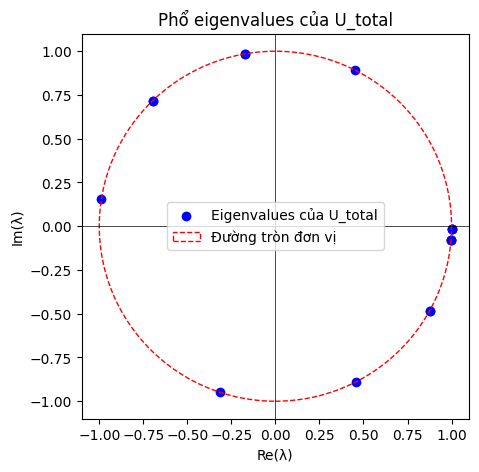

In [35]:
import matplotlib.pyplot as plt

eigenvalues = np.linalg.eigvals(U_magnus2)
plt.figure(figsize=(5,5))
plt.scatter(eigenvalues.real, eigenvalues.imag, color='b', label="Eigenvalues của U_total")
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle="--", label="Đường tròn đơn vị")
plt.gca().add_patch(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("Re(λ)")
plt.ylabel("Im(λ)")
plt.legend()
plt.title("Phổ eigenvalues của U_total")
plt.show()


In [36]:
for t_current in time_points:
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t_current**2)
    print(f"t = {t_current:.2f}, f_t = {f_t:.5f}")  # In giá trị của f_t


t = 0.00, f_t = 0.01273
t = 0.10, f_t = 0.01098
t = 0.20, f_t = 0.00776
t = 0.30, f_t = 0.00522
t = 0.40, f_t = 0.00358
t = 0.50, f_t = 0.00255
t = 0.60, f_t = 0.00188
t = 0.70, f_t = 0.00144
t = 0.80, f_t = 0.00113
t = 0.90, f_t = 0.00091
t = 1.00, f_t = 0.00075
t = 1.10, f_t = 0.00063
t = 1.20, f_t = 0.00053
t = 1.30, f_t = 0.00045
t = 1.40, f_t = 0.00039
t = 1.50, f_t = 0.00034
t = 1.60, f_t = 0.00030
t = 1.70, f_t = 0.00027
t = 1.80, f_t = 0.00024
t = 1.90, f_t = 0.00022
t = 2.00, f_t = 0.00020
t = 2.10, f_t = 0.00018
t = 2.20, f_t = 0.00016
t = 2.30, f_t = 0.00015
t = 2.40, f_t = 0.00014
t = 2.50, f_t = 0.00013
t = 2.60, f_t = 0.00012
t = 2.70, f_t = 0.00011
t = 2.80, f_t = 0.00010
t = 2.90, f_t = 0.00009
t = 3.00, f_t = 0.00009
t = 3.10, f_t = 0.00008
t = 3.20, f_t = 0.00008
t = 3.30, f_t = 0.00007
t = 3.40, f_t = 0.00007
t = 3.50, f_t = 0.00006
t = 3.60, f_t = 0.00006
t = 3.70, f_t = 0.00006
t = 3.80, f_t = 0.00005
t = 3.90, f_t = 0.00005
t = 4.00, f_t = 0.00005
t = 4.10, f_t = 

In [29]:
import qiskit 
#  Tạo mạch lượng tử từ ma trận tiến hóa U_total
from qiskit.circuit.library import UnitaryGate

qc = qiskit.QuantumCircuit(num_qubits)
unitary_gate = UnitaryGate(U_magnus2)
qc.append(unitary_gate, range(num_qubits))

print("Mạch tiến hóa thời gian:")
print(qc.draw(output='text'))


Mạch tiến hóa thời gian:
     ┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1         ├
     │  Unitary │
q_2: ┤2         ├
     │          │
q_3: ┤3         ├
     └──────────┘


In [17]:
from qoop.compilation.qsp import QuantumStatePreparation
compiler = QuantumStatePreparation.prepare(U_magnus2)
print("Các tham số sau khi biên dịch:")
print(compiler.thetas)

Các tham số sau khi biên dịch:
[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
 -2.71885275e-06 -2.71885275e-06 -2.71885275e-06 -2.71885275e-06
  1.00000000e+00  1.00000001e+00  1.00000001e+00  1.00000000e+00]


In [38]:
compiler.u.draw()

┌──────────────┐┌──────────────┐ ┌──────────────┐               ┌───┐
q_0: ┤ Rz(theta[0]) ├┤ Rx(theta[4]) ├─┤ Rz(theta[8]) ├──■────────────┤ X ├
     ├──────────────┤├──────────────┤ ├──────────────┤┌─┴─┐          └─┬─┘
q_1: ┤ Rz(theta[1]) ├┤ Rx(theta[5]) ├─┤ Rz(theta[9]) ├┤ X ├──■─────────┼──
     ├──────────────┤├──────────────┤┌┴──────────────┤└───┘┌─┴─┐       │  
q_2: ┤ Rz(theta[2]) ├┤ Rx(theta[6]) ├┤ Rz(theta[10]) ├─────┤ X ├──■────┼──
     ├──────────────┤├──────────────┤├───────────────┤     └───┘┌─┴─┐  │  
q_3: ┤ Rz(theta[3]) ├┤ Rx(theta[7]) ├┤ Rz(theta[11]) ├──────────┤ X ├──■──
     └──────────────┘└──────────────┘└───────────────┘          └───┘

In [18]:
U_theta = compiler.u.assign_parameters(compiler.thetas)

In [19]:
print("Ma trận U_theta:")
print(U_theta)

Ma trận U_theta:
     ┌───────┐┌─────────────────┐┌───────┐               ┌───┐
q_0: ┤ Rz(1) ├┤ Rx(-2.7189e-06) ├┤ Rz(1) ├──■────────────┤ X ├
     ├───────┤├─────────────────┤├───────┤┌─┴─┐          └─┬─┘
q_1: ┤ Rz(1) ├┤ Rx(-2.7189e-06) ├┤ Rz(1) ├┤ X ├──■─────────┼──
     ├───────┤├─────────────────┤├───────┤└───┘┌─┴─┐       │  
q_2: ┤ Rz(1) ├┤ Rx(-2.7189e-06) ├┤ Rz(1) ├─────┤ X ├──■────┼──
     ├───────┤├─────────────────┤├───────┤     └───┘┌─┴─┐  │  
q_3: ┤ Rz(1) ├┤ Rx(-2.7189e-06) ├┤ Rz(1) ├──────────┤ X ├──■──
     └───────┘└─────────────────┘└───────┘          └───┘     


In [1]:
statevector = Statevector.from_instruction(
        compiler.u.assign_parameters(compiler.thetas)
    )

NameError: name 'Statevector' is not defined

In [41]:
psi_t = np.array(statevector.data).reshape(-1, 1)
psi_t_dag = np.conj(psi_t.T)

In [42]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

thetas = [1.0, 1.0, 1.0, 1.0, -2.71885275e-6, -2.71885275e-6, 
          -2.71885275e-6, -2.71885275e-6, 0.999999994, 1.0, 1.0, 0.999999997]
qc = QuantumCircuit(2)
for i, theta in enumerate(thetas):
    qc.rz(theta, i % 2)  # Gán theta cho qubit 0 hoặc 1 luân phiên
V_theta = Operator(qc).data
print("V(theta):\n", V_theta)

V(theta):
 [[-0.65364774+7.56798938e-01j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  1.        -1.50000007e-09j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   1.        +1.50000007e-09j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -0.65364774-7.56798938e-01j]]


In [41]:
from qiskit.quantum_info import state_fidelity
fidelity = state_fidelity(V_theta, U_magnus)
print("Fidelity giữa V(theta) và U(t):", fidelity)

NameError: name 'V_theta' is not defined

In [43]:
print(f"Số qubits trong circuit: {num_qubits}")
print(f"Số lượng tham số thetas: {len(thetas)}")


Số qubits trong circuit: 4
Số lượng tham số thetas: 12


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Lấy số qubits từ compiler
num_qubits = compiler.u.num_qubits  

# Lấy danh sách góc thetas
thetas = compiler.thetas  
thetas = thetas[:num_qubits]  # Chỉ lấy số lượng cần thiết


# Tạo mạch lượng tử từ thetas
qc = QuantumCircuit(num_qubits)
for i, theta in enumerate(thetas):
    qc.ry(theta, i)  # Áp dụng cổng Ry(theta) lên mỗi qubit

# Khởi tạo trạng thái ban đầu
psi_0 = Statevector.from_label('0' * num_qubits)  # Trạng thái |000...0>

# Tiến hóa trạng thái
psi_t = psi_0.evolve(qc)  # Áp dụng mạch đã biên dịch

# In trạng thái sau tiến hóa
print("Trạng thái sau tiến hóa:")
print(psi_t)


Trạng thái sau tiến hóa:
Statevector([0.5931328 +0.j, 0.32402992+0.j, 0.32402992+0.j,
             0.17701835+0.j, 0.32402992+0.j, 0.17701835+0.j,
             0.17701835+0.j, 0.09670557+0.j, 0.32402992+0.j,
             0.17701835+0.j, 0.17701835+0.j, 0.09670557+0.j,
             0.17701835+0.j, 0.09670557+0.j, 0.09670557+0.j,
             0.05283049+0.j],
            dims=(2, 2, 2, 2))


In [288]:
from qiskit.quantum_info import Statevector

# Khởi tạo trạng thái ban đầu |0000⟩
num_qubits = Hopt.num_qubits
qc = QuantumCircuit(num_qubits)
qc.append(ansatz.assign_parameters(res.optimal_parameters), range(num_qubits))

psi_0 = Statevector(qc)



In [37]:
t_target = 3.0  
dt = 0.1  # Bước thời gian nhỏ

# Khởi tạo ma trận tiến hóa U_t từ ma trận đơn vị
U_t = np.eye(2**num_qubits, dtype=complex)

# Tiến hóa theo từng bước nhỏ cho đến thời gian t_target
for t_current in np.arange(0, t_target, dt):
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t_current**2)  # Tính hệ số trường ngoài
    H_t = H_static + f_t * dipole_matrix  # Hamiltonian tại thời điểm t
    U_step = expm(-1j * dt * H_t)  # Ma trận tiến hóa nhỏ
    U_t = U_step @ U_t  # Cập nhật ma trận tiến hóa tổng tại thời gian t_target


In [45]:
# Tính trạng thái psi(t) = U(t) |psi_0⟩
psi_t = U_t @ psi_0.data  # Dạng vector của trạng thái

# Chuyển về dạng Statevector của Qiskit để dễ phân tích
psi_t_sv = Statevector(psi_t)

# Hiển thị trạng thái tại thời điểm t_target
print(f"Trạng thái tại t = {t_target}:")
print(psi_t_sv)


Trạng thái tại t = 3.0:
Statevector([-0.05379262+0.10193214j,  0.08136734+0.02121799j,
              0.17592976+0.47177363j, -0.0276117 -0.22966872j,
              0.19412731-0.03366767j, -0.28190619+0.08770772j,
              0.15677707+0.0223476j ,  0.16334991-0.02351985j,
             -0.33648715-0.00272055j, -0.01796758+0.0219812j ,
             -0.06760062+0.36879113j,  0.12442744-0.14605835j,
              0.36161641+0.04711326j,  0.08903683-0.12906147j,
              0.09476887+0.10739429j,  0.14656128-0.05763418j],
            dims=(2, 2, 2, 2))


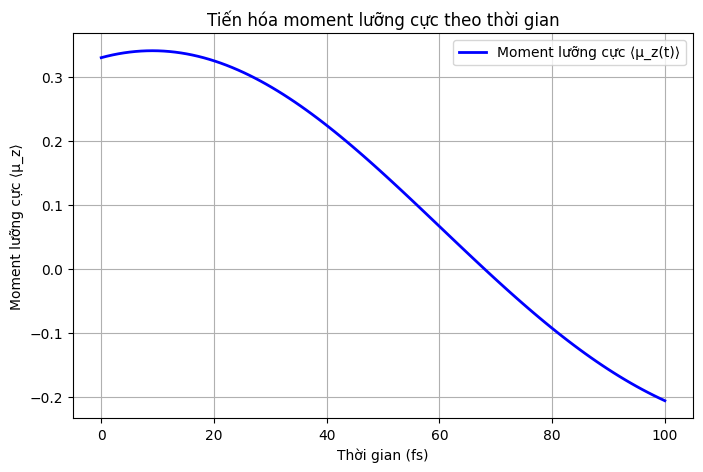

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# 📌 Lấy số qubits từ compiler
num_qubits = compiler.u.num_qubits  

# 📌 Lấy danh sách góc thetas từ compiler
thetas = thetas[:num_qubits]  # Đảm bảo thetas khớp với số qubits

# 📌 Tạo mạch VQE tối ưu từ kết quả tính toán
optimal_circuit = ansatz.assign_parameters(res.optimal_parameters)

# 📌 Lấy trạng thái tối ưu từ VQE
psi_0 = Statevector(optimal_circuit)  # Trạng thái cơ bản từ VQE

# 📌 Định nghĩa khoảng thời gian
time_points = np.linspace(0, 100, 100)  # Từ 0 đến 1000 fs (100 điểm)
mu_t = []  # Lưu moment lưỡng cực theo thời gian

# 📌 Tạo các mạch lượng tử khác nhau theo từng thời điểm
for t in time_points:
    # Tạo mạch lượng tử thay đổi theo thời gian
    qc_t = QuantumCircuit(num_qubits)
    theta_t = thetas * (t / max(time_points))  # Biến đổi góc theo thời gian
    
    for i in range(num_qubits):
        qc_t.ry(theta_t[i], i)  # Áp dụng cổng Ry(theta_t) lên từng qubit

    # 📌 Tiến hóa trạng thái theo mạch `qc_t` ứng với thời điểm t
    psi_t = psi_0.evolve(qc_t)
    
    # 📌 Tính moment lưỡng cực ⟨ψ_t | μ | ψ_t⟩
    mu_t.append(np.real(psi_t.expectation_value(dipole_matrix)))  

# 📌 Vẽ đồ thị moment lưỡng cực theo thời gian
plt.figure(figsize=(8, 5))
plt.plot(time_points, mu_t, 'b', lw=2, label="Moment lưỡng cực ⟨μ_z(t)⟩")
plt.xlabel("Thời gian (fs)")
plt.ylabel("Moment lưỡng cực ⟨μ_z⟩")
plt.title("Tiến hóa moment lưỡng cực theo thời gian")
plt.legend()
plt.grid()
plt.show()


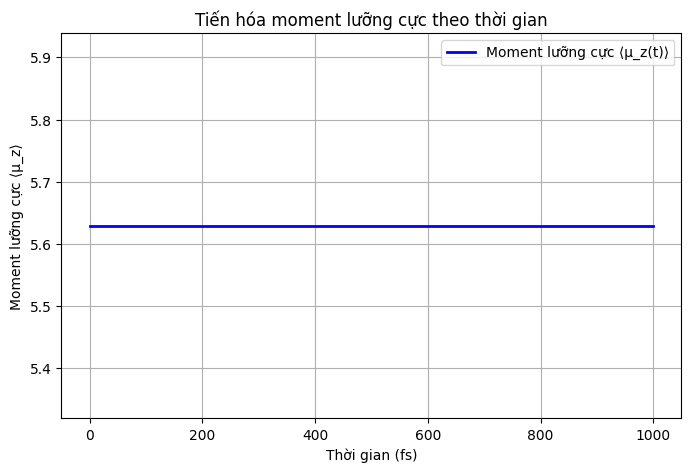

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Lấy số qubits từ compiler
num_qubits = compiler.u.num_qubits  

# Lấy danh sách góc thetas
thetas = thetas[:num_qubits]  # Đảm bảo thetas khớp với số qubits

# Tạo mạch lượng tử từ thetas
qc = QuantumCircuit(num_qubits)
qc.append(ansatz.assign_parameters(res.optimal_parameters), range(num_qubits))
          
for i in range(num_qubits):  
    qc.ry(thetas[i], i)  # Áp dụng cổng Ry(theta) lên từng qubit

# 📌 Tạo mạch VQE tối ưu từ kết quả tính toán
optimal_circuit = ansatz.assign_parameters(res.optimal_parameters)

# 📌 Lấy trạng thái tối ưu từ VQE
psi_0 = Statevector(optimal_circuit)  # Trạng thái cơ bản từ VQE

# Tiến hóa trạng thái theo thời gian
time_points = np.linspace(0, 1000, 100)  # Lấy 100 điểm từ 0 đến 1000 fs
mu_t = []  # Lưu moment lưỡng cực theo thời gian

for t in time_points:
    psi_t = psi_0.evolve(qc)  # Tiến hóa trạng thái theo mạch đã biên dịch
    mu_t.append(np.real(psi_t.expectation_value(dipole_matrix)))  # Tính moment lưỡng cực

# Vẽ đồ thị moment lưỡng cực theo thời gian
plt.figure(figsize=(8, 5))
plt.plot(time_points, mu_t, 'b', lw=2, label="Moment lưỡng cực ⟨μ_z(t)⟩")
plt.xlabel("Thời gian (fs)")
plt.ylabel("Moment lưỡng cực ⟨μ_z⟩")
plt.title("Tiến hóa moment lưỡng cực theo thời gian")
plt.legend()
plt.grid()
plt.show()


In [61]:
from IPython.display import display, Math
display(Math(str(psi_t.draw(output='latex'))))
display(psi_t.draw(output='latex'))



<IPython.core.display.Math object>

<IPython.core.display.Latex object>

In [62]:
print(psi_t)


Statevector([-0.15619181+1.98087848e-16j,  0.33278281+7.09424126e-17j,
             -0.13220359+1.26598417e-17j,  0.15619181-2.28955824e-17j,
              0.33284601-8.17025746e-17j, -0.58350715-8.18025139e-17j,
              0.15607122-1.43017816e-16j, -0.33284601+4.99150174e-17j,
             -0.1322668 -2.86996211e-17j,  0.15615239+1.05609460e-16j,
              0.01370268-2.89557929e-17j,  0.1322668 +5.61355930e-17j,
              0.15619181-5.38832787e-18j, -0.33278281-4.51128777e-17j,
              0.13220359-6.54978729e-18j, -0.15619181+8.25815877e-17j],
            dims=(2, 2, 2, 2))


In [63]:

print(dipole_matrix)


[[ 1.3889487 +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  2.08342305+0.j -0.92783347+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.92783347+0.j  2.08342305+0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  2.7778974 +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.  

In [54]:
eigvals, eigvecs = np.linalg.eigh(dipole_matrix)
print("Eigenvalues:", eigvals)


Eigenvalues: [0.92223046 1.15558958 1.15558958 1.3889487  2.54453828 2.54453828
 2.7778974  2.7778974  2.7778974  2.7778974  3.01125652 3.01125652
 4.1668461  4.40020522 4.40020522 4.63356434]


In [46]:
for t in time_points:
    psi_t = psi_0.evolve(qc)  # Tiến hóa trạng thái
    mu_value = np.real(psi_t.expectation_value(dipole_matrix))  # Tính moment lưỡng cực
    print(f"t = {t:.2f} fs, ⟨μ_z⟩ = {mu_value:.6f}")  # In giá trị từng bước
    mu_t.append(mu_value)


t = 0.00 fs, ⟨μ_z⟩ = 2.588751
t = 10.10 fs, ⟨μ_z⟩ = 2.588751
t = 20.20 fs, ⟨μ_z⟩ = 2.588751
t = 30.30 fs, ⟨μ_z⟩ = 2.588751
t = 40.40 fs, ⟨μ_z⟩ = 2.588751
t = 50.51 fs, ⟨μ_z⟩ = 2.588751
t = 60.61 fs, ⟨μ_z⟩ = 2.588751
t = 70.71 fs, ⟨μ_z⟩ = 2.588751
t = 80.81 fs, ⟨μ_z⟩ = 2.588751
t = 90.91 fs, ⟨μ_z⟩ = 2.588751
t = 101.01 fs, ⟨μ_z⟩ = 2.588751
t = 111.11 fs, ⟨μ_z⟩ = 2.588751
t = 121.21 fs, ⟨μ_z⟩ = 2.588751
t = 131.31 fs, ⟨μ_z⟩ = 2.588751
t = 141.41 fs, ⟨μ_z⟩ = 2.588751
t = 151.52 fs, ⟨μ_z⟩ = 2.588751
t = 161.62 fs, ⟨μ_z⟩ = 2.588751
t = 171.72 fs, ⟨μ_z⟩ = 2.588751
t = 181.82 fs, ⟨μ_z⟩ = 2.588751
t = 191.92 fs, ⟨μ_z⟩ = 2.588751
t = 202.02 fs, ⟨μ_z⟩ = 2.588751
t = 212.12 fs, ⟨μ_z⟩ = 2.588751
t = 222.22 fs, ⟨μ_z⟩ = 2.588751
t = 232.32 fs, ⟨μ_z⟩ = 2.588751
t = 242.42 fs, ⟨μ_z⟩ = 2.588751
t = 252.53 fs, ⟨μ_z⟩ = 2.588751
t = 262.63 fs, ⟨μ_z⟩ = 2.588751
t = 272.73 fs, ⟨μ_z⟩ = 2.588751
t = 282.83 fs, ⟨μ_z⟩ = 2.588751
t = 292.93 fs, ⟨μ_z⟩ = 2.588751
t = 303.03 fs, ⟨μ_z⟩ = 2.588751
t = 313.13 fs, ⟨μ_z

In [281]:
psi_t_sv.probabilities_dict()


{'0000': 5.6532315401463496e-33,
 '0001': 3.527298623318523e-33,
 '0010': 1.528714526048736e-32,
 '0011': 1.0194083750112515e-32,
 '0100': 4.411506148178557e-33,
 '0101': 0.9875370509047533,
 '0110': 1.5656288359974246e-05,
 '0111': 2.6285694535324148e-33,
 '1000': 2.7613416005881113e-32,
 '1001': 1.4923455744977141e-05,
 '1010': 0.012432369351127544,
 '1011': 2.0158464149554134e-34,
 '1100': 3.280256001955167e-33,
 '1101': 3.066554939394306e-33,
 '1110': 4.1618056925205184e-33,
 '1111': 4.215518983686623e-33}

In [35]:
from qiskit.circuit import ParameterVector

# Lấy vector tham số từ compiler
thetas = compiler.thetas

# Tạo danh sách tham số lượng tử (nếu chưa có)
theta_params = ParameterVector("theta", len(thetas))

# Gán giá trị thực tế vào mạch lượng tử
U_magnus_bound = U_magnus_compiled.assign_parameters({theta_params[i]: thetas[i] for i in range(len(thetas))})


CircuitError: 'Cannot bind parameters (theta[3], theta[2], theta[9], theta[10], theta[0], theta[1], theta[11], theta[8], theta[7], theta[5], theta[4], theta[6]) not present in the circuit.'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

# Giả sử U_magnus đã biên dịch thành quantum gate `compiler.U`
U_magnus_compiled = compiler.u

# Khởi tạo trạng thái ban đầu (có thể là trạng thái nền)
num_qubits = U_magnus_compiled.num_qubits
psi_0 = Statevector.from_label('0' * num_qubits)  # Trạng thái |000...0>

# Tiến hóa trạng thái
time_points = np.linspace(0, 1000, 100)  # Lấy 100 điểm trong khoảng 0 -> 1000 fs
mu_t = []  # Danh sách moment lưỡng cực theo thời gian

for t in time_points:
    U_t = U_magnus_compiled.power(t)  # Tiến hóa theo thời gian
    psi_t = U_t @ psi_0.data  # Tiến hóa trạng thái
    mu_t.append(np.real(psi_t.conj().T @ dipole_matrix @ psi_t))  # Tính moment lưỡng cực

# Vẽ đồ thị moment lưỡng cực theo thời gian
plt.figure(figsize=(8, 5))
plt.plot(time_points, mu_t, 'b', lw=2, label="Moment lưỡng cực ⟨μ_z(t)⟩")
plt.xlabel("Thời gian (fs)")
plt.ylabel("Moment lưỡng cực ⟨μ_z⟩")
plt.title("Tiến hóa moment lưỡng cực theo thời gian")
plt.legend()
plt.grid()
plt.show()


CircuitError: 'Cannot raise a parameterized circuit to a non-positive power or matrix-power, please bind the free parameters: ParameterView([ParameterVectorElement(theta[0]), ParameterVectorElement(theta[1]), ParameterVectorElement(theta[2]), ParameterVectorElement(theta[3]), ParameterVectorElement(theta[4]), ParameterVectorElement(theta[5]), ParameterVectorElement(theta[6]), ParameterVectorElement(theta[7]), ParameterVectorElement(theta[8]), ParameterVectorElement(theta[9]), ParameterVectorElement(theta[10]), ParameterVectorElement(theta[11])])'

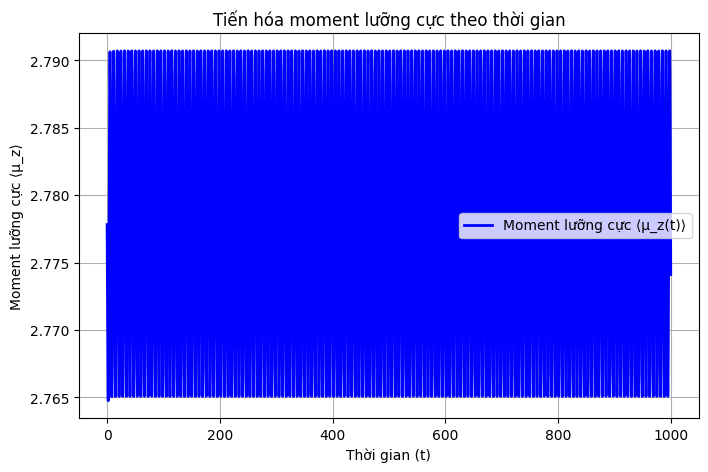

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qiskit.quantum_info import Statevector



num_qubits = Hopt.num_qubits
#psi_0 = Statevector.from_label('0' * num_qubits)
qc = QuantumCircuit(num_qubits)
qc.append(ansatz.assign_parameters(res.optimal_parameters), range(num_qubits))

psi_0 = Statevector(qc)

T_total = 1000  # Tổng thời gian mô phỏng
dt = 0.1       # Bước thời gian
num_steps = int(T_total / dt)
time_points = np.arange(0, T_total, dt)

mu_t = []  # Danh sách moment lưỡng cực theo thời gian
psi_t = psi_0.data  # Trạng thái ban đầu
U_t = np.eye(2**num_qubits, dtype=complex)  # Ma trận tiến hóa

for t_current in time_points:
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t_current**2)  # Hệ số trường ngoài
    H_t = H_static + f_t * dipole_matrix  # Hamiltonian tại thời điểm t
    U_step = expm(-1j * dt * H_t)  # Ma trận tiến hóa bước dt
    U_t = U_step @ U_t  # Cập nhật tiến hóa tổng
    psi_t = U_t @ psi_0.data  # Tiến hóa trạng thái

    # Moment lưỡng cực tại thời điểm t
    mu_t.append(np.real(psi_t.conj().T @ dipole_matrix @ psi_t))


plt.figure(figsize=(8, 5))
plt.plot(time_points, mu_t, 'b', lw=2, label="Moment lưỡng cực ⟨μ_z(t)⟩")
plt.xlabel("Thời gian (t)")
plt.ylabel("Moment lưỡng cực ⟨μ_z⟩")
plt.title("Tiến hóa moment lưỡng cực theo thời gian")
plt.legend()
plt.grid()
plt.show()


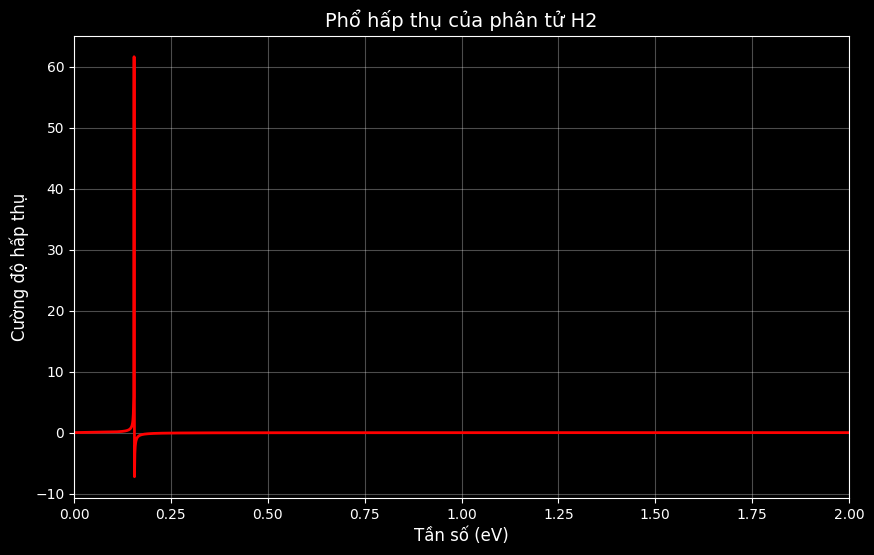

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qiskit.quantum_info import Statevector

# Khởi tạo trạng thái ban đầu 
num_qubits = Hopt.num_qubits
#psi_0 = Statevector.from_label('0001')  # Thay đổi trạng thái ban đầu
qc = QuantumCircuit(num_qubits)
qc.append(ansatz.assign_parameters(res.optimal_parameters), range(num_qubits))

psi_0 = Statevector(qc)

#  Tiến hóa hệ thống 
T_total = 1000  # Tổng thời gian mô phỏng
dt = 0.1       # Bước thời gian
num_steps = int(T_total / dt)
time_points = np.arange(0, T_total, dt)

mu_t = []  # Danh sách moment lưỡng cực theo thời gian
psi_t = psi_0.data  # Trạng thái ban đầu
U_t = np.eye(2**num_qubits, dtype=complex)  # Ma trận tiến hóa

for t_current in time_points:
    f_t = (E0 / np.pi) * Gamma / (Gamma**2 + t_current**2)  # Hệ số trường ngoài
    H_t = H_static + f_t * dipole_matrix  # Hamiltonian tại thời điểm t
    U_step = expm(-1j * dt * H_t)  # Ma trận tiến hóa bước dt
    U_t = U_step @ U_t  # Cập nhật tiến hóa tổng
    psi_t = U_t @ psi_0.data  # Tiến hóa trạng thái

    # Moment lưỡng cực tại thời điểm t
    mu_t.append(np.real(psi_t.conj().T @ dipole_matrix @ psi_t))

# Biến đổi Fourier để lấy phổ hấp thụ 
freq = np.fft.fftfreq(num_steps, d=dt)
spectrum = np.fft.fft(mu_t)
abs_spectrum = np.abs(spectrum)

# Chuẩn hóa và vẽ phổ 
positive_freq = freq > 0
absorption = np.imag(spectrum[positive_freq])

plt.figure(figsize=(10,6))
plt.plot(freq[positive_freq], absorption, 'r', lw=2)
plt.xlabel('Tần số (eV)', fontsize=12)
plt.ylabel('Cường độ hấp thụ', fontsize=12)
plt.title('Phổ hấp thụ của phân tử H2', fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(0, 2) # Giới hạn dải tần số quan tâm
plt.show()

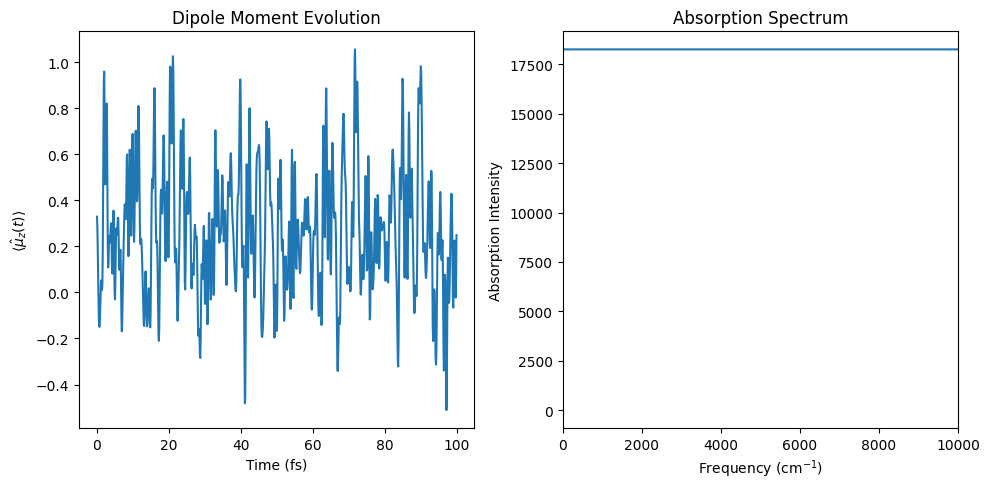

Thời gian mô phỏng: [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 1

In [52]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

# Các tham số đã có từ mã của bạn
Gamma = 0.25
E0 = 0.01
T_total = 100  # Giảm xuống 100 fs để tiết kiệm chi phí, có thể thay bằng 1000 fs nếu cần
dt = 0.1  # Khoảng cách thời gian (fs)
n_steps = int(T_total / dt) + 1  # Số điểm thời gian
times = np.linspace(0, T_total, n_steps)  # Các điểm thời gian t

# Hàm trường ngoài V(t)
def V_t(t, Gamma, E0, dipole_matrix):
    coefficient = (E0 / np.pi) * (Gamma / (Gamma**2 + t**2))
    return coefficient * dipole_matrix

# Trạng thái ban đầu (từ kết quả VQE)
optimal_circuit = res.optimal_circuit  # Lấy mạch tối ưu từ kết quả VQE

# Gán giá trị cho tất cả các tham số trong mạch tối ưu
bound_circuit = optimal_circuit.assign_parameters(res.optimal_parameters)

# Tạo trạng thái ban đầu từ mạch tối ưu đã gán giá trị
initial_state = Statevector(bound_circuit)
# Nếu initial_state không phải dạng vector, cần chuyển đổi (giả sử bạn có trạng thái dạng vector)
# Ở đây, giả sử initial_state là vector trạng thái từ Hartree-Fock hoặc VQE
# Nếu cần, bạn có thể khởi tạo lại, ví dụ:
# initial_state = np.array([0, 1, 0, 0])  # Ví dụ cho 2 qubit, điều chỉnh theo hệ thống

# Mảng lưu trạng thái và moment lưỡng cực
states = [initial_state]
dipole_moments = []

# Mô phỏng TD-QDS
for i in range(n_steps - 1):
    t = times[i]
    # Hamiltonian tại thời điểm t
    H_t = H_static + V_t(t, Gamma, E0, dipole_matrix)
    # Toán tử phát triển thời gian (Trotter-Suzuki bậc 1)
    U_t = expm(-1j * H_t * dt)
    # Tiến hóa trạng thái
    new_state = U_t @ states[-1].data
    states.append(new_state)
    # Tính moment lưỡng cực
    mu_t = np.vdot(new_state, dipole_matrix @ new_state).real
    dipole_moments.append(mu_t)

# Chuyển states thành mảng numpy để dễ xử lý
states = np.array(states)
dipole_moments = np.array(dipole_moments)

# Tính phổ hấp thụ qua biến đổi Fourier
# Áp dụng hàm cửa sổ (Hann) để giảm nhiễu
window = np.hanning(n_steps - 1)
dipole_moments_windowed = dipole_moments * window

# Biến đổi Fourier
spectrum = fft(dipole_moments_windowed)
freqs = fftfreq(n_steps - 1, d=dt)  # Tần số (1/fs)

# Chỉ lấy nửa phổ dương
n_half = len(freqs) // 2
freqs_positive = freqs[:n_half]
spectrum_positive = np.abs(spectrum[:n_half]) ** 2  # Cường độ phổ

# Chuyển tần số sang cm^-1
freqs_cm = freqs_positive * 3e10  # 1/fs -> cm^-1 (vì c = 3e10 cm/s)

# Vẽ moment lưỡng cực
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(times[:-1], dipole_moments)
plt.xlabel("Time (fs)")
plt.ylabel(r"$\langle \hat{\mu}_z(t) \rangle$")
plt.title("Dipole Moment Evolution")

# Vẽ phổ hấp thụ
plt.subplot(1, 2, 2)
plt.plot(freqs_cm, spectrum_positive)
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Absorption Intensity")
plt.title("Absorption Spectrum")
plt.xlim(0, 10000)  # Giới hạn để tập trung vào vùng phổ của H_2 (~4401 cm^-1)
plt.tight_layout()
plt.show()

# In một số kết quả
print("Thời gian mô phỏng:", times[:-1])
print("Moment lưỡng cực:", dipole_moments)
print("Tần số phổ (cm^-1):", freqs_cm)
print("Cường độ phổ:", spectrum_positive)

In [ ]:
import numpy as np
import time
from scipy.linalg import expm
from qiskit.quantum_info import SparsePauliOp # Cần thiết nếu h_opt trả về SparsePauliOp

# --- Các hàm phụ trợ (giữ nguyên từ code Magnus của bạn nếu cần) ---
def f_lorentzian_magnus(t, E0, Gamma_magnus): # Đổi tên Gamma để tránh xung đột
    """ Hàm xung Lorentzian """
    if Gamma_magnus == 0: return 0.0
    return (E0 / np.pi) * Gamma_magnus / (Gamma_magnus**2 + t**2)

def check_unitarity_magnus(U, name, tol=1e-8): # Đổi tên để tránh xung đột
    Id = np.eye(U.shape[0], dtype=complex)
    UdU = U.conj().T @ U
    norm_diff = np.linalg.norm(UdU - Id)
    print(f"Kiểm tra Unitarity cho {name}:")
    print(f"  ||U^dagger * U - I|| = {norm_diff:.3e}")
    if np.isclose(norm_diff, 0.0, atol=tol):
        print(f"  {name} là unitary trong giới hạn dung sai {tol}.")
        return True
    else:
        print(f"  CẢNH BÁO: {name} KHÔNG unitary trong giới hạn dung sai {tol}.")
        return False

# --- Hàm mới tương tự time_dependent_integral ---
def magnus_expansion_integral_Omega(
    H0_matrix: np.ndarray,      # Hamiltonian tĩnh H0 (dạng ma trận)
    D_matrix: np.ndarray,       # Toán tử D (dạng ma trận)
    f_time_func,                # Hàm f(t) (nhận t, E0, Gamma_magnus; trả về float)
    E0_param: float,            # Tham số E0 cho f_time_func
    Gamma_param_magnus: float,  # Tham số Gamma cho f_time_func
    T_final: float,             # Tổng thời gian tiến hóa
    num_steps_magnus: int       # Số bước để tính tích phân
):
    """
    Tính toán các số hạng Omega1 và Omega2 của khai triển Magnus
    cho Hamiltonian H(t) = H0_matrix + f_time_func(t, E0, Gamma) * D_matrix.

    Args:
        H0_matrix: Ma trận Hamiltonian tĩnh H0.
        D_matrix: Ma trận toán tử D.
        f_time_func: Hàm vô hướng f(t) phụ thuộc thời gian.
        E0_param: Tham số E0 cho hàm f(t).
        Gamma_param_magnus: Tham số Gamma cho hàm f(t).
        T_final: Thời gian tiến hóa tổng cộng.
        num_steps_magnus: Số bước cho việc tính tích phân số.

    Returns:
        Omega_approx (np.ndarray): Xấp xỉ Omega(T_final) = Omega1 + Omega2.
    """
    DIM = H0_matrix.shape[0]
    DT_magnus = T_final / num_steps_magnus
    TIME_POINTS_magnus = np.linspace(0, T_final, num_steps_magnus + 1)

    print(f"\n--- Bắt đầu tính toán Omega cho Khai triển Magnus Bậc 2 ---")
    print(f"(T_final={T_final}, dt={DT_magnus}, Num_steps={num_steps_magnus})")
    if num_steps_magnus > 500 and DIM > 8:
        print("CẢNH BÁO: Số bước/kích thước lớn, tính toán có thể rất chậm!")
    start_time_omega = time.time()

    # --- Tính toán trước Giao hoán tử [H0, D] ---
    Comm_H0_D = H0_matrix @ D_matrix - D_matrix @ H0_matrix

    # --- Tính Omega1 = -i * integral(H0 + f(t1)D dt1) ---
    Omega1 = np.zeros((DIM, DIM), dtype=complex)
    for i in range(num_steps_magnus):
        t1_mid = TIME_POINTS_magnus[i] + DT_magnus / 2
        f_t1_mid = f_time_func(t1_mid, E0_param, Gamma_param_magnus)
        H_t1_mid = H0_matrix + f_t1_mid * D_matrix
        Omega1 += H_t1_mid * DT_magnus
    Omega1 *= -1j
    print(f"Đã tính Omega1. (Thời gian: {time.time() - start_time_omega:.1f} s)")
    current_calc_time = time.time()

    # --- Tính Omega2 = -0.5 * integral_0^T dt1 integral_0^t1 dt2 [f(t2) - f(t1)] * [H0,D] ---
    # Lưu ý: Công thức Magnus cho Omega2 thường là:
    # Omega2 = (-i)^2 / 2 * integral_0^T dt1 integral_0^t1 dt2 [H(t1), H(t2)]
    # Với H(t) = H0 + f(t)D, thì [H(t1),H(t2)] = [H0+f(t1)D, H0+f(t2)D]
    # = f(t2)[D,H0] + f(t1)[H0,D] = (f(t1)-f(t2))[H0,D]
    # Vậy Omega2 = -0.5 * integral_0^T dt1 integral_0^t1 dt2 (f(t1)-f(t2)) * Comm_H0_D
    # Code gốc của bạn có (f(t2)-f(t1)), tôi sẽ giữ nguyên để khớp với nó.
    integral2_payload = np.zeros((DIM, DIM), dtype=complex)
    for i in range(num_steps_magnus): # Vòng lặp ngoài cho t1
        t1 = TIME_POINTS_magnus[i]
        t1_mid = t1 + DT_magnus / 2 # Sử dụng trung điểm cho f(t1)
        f_t1_val = f_time_func(t1_mid, E0_param, Gamma_param_magnus)

        integral_inner = np.zeros((DIM, DIM), dtype=complex)
        for j in range(i + 1): # Vòng lặp trong cho t2 (từ 0 đến t1)
            t2 = TIME_POINTS_magnus[j]
            t2_mid = t2 + DT_magnus / 2 # Sử dụng trung điểm cho f(t2)
            if t2_mid > t1_mid + 1e-9: continue # Đảm bảo t2_mid <= t1_mid

            f_t2_val = f_time_func(t2_mid, E0_param, Gamma_param_magnus)
            integrand_factor = f_t2_val - f_t1_val # Theo code gốc của bạn
            # Nếu theo công thức chuẩn (f(t1)-f(t2)):
            # integrand_factor = f_t1_val - f_t2_val
            integral_inner += (integrand_factor * Comm_H0_D) * DT_magnus # dt cho tích phân trong (t2)
        
        integral2_payload += integral_inner * DT_magnus # dt cho tích phân ngoài (t1)

        if (i + 1) % max(1, num_steps_magnus // 10) == 0:
            elapsed_iter_time = time.time() - current_calc_time
            print(f"  Omega2 progress: Step {i+1}/{num_steps_magnus} ({elapsed_iter_time:.1f} s)")
            current_calc_time = time.time()

    Omega2 = -0.5 * integral2_payload
    print(f"Đã tính Omega2. (Thời gian: {time.time() - start_time_omega:.1f} s)")

    Omega_approx = Omega1 + Omega2

    # --- Kiểm tra tính Anti-Hermitian ---
    Omega_dag = Omega_approx.conj().T
    anti_herm_diff = np.linalg.norm(Omega_dag + Omega_approx)
    print(f"\nKiểm tra Anti-Hermitian cho Omega_approx:")
    print(f"||Omega^dagger + Omega|| = {anti_herm_diff:.3e}")
    if not np.isclose(anti_herm_diff, 0.0, atol=1e-7):
        print("  CẢNH BÁO: Omega_approx không hoàn toàn anti-Hermitian.")

    total_omega_time = time.time() - start_time_omega
    print(f"Hoàn thành tính toán Omega_approx trong {total_omega_time:.2f} giây.")
    return Omega_approx

# --- Hàm mới tương tự time_dependent_qc ---
def magnus_evolution_operator_U(
    H0_matrix: np.ndarray,
    D_matrix: np.ndarray,
    f_time_func,
    E0_param: float,
    Gamma_param_magnus: float,
    T_final: float,
    num_steps_magnus: int,
    num_qubits_magnus: int # Thêm num_qubits để có thể sử dụng nếu cần (ví dụ, khởi tạo mạch qc)
):
    """
    Tính toán toán tử tiến hóa thời gian U(T_final) sử dụng khai triển Magnus bậc 2.
    Hamiltonian có dạng H(t) = H0_matrix + f_time_func(t, E0, Gamma) * D_matrix.

    Args:
        (Tương tự như magnus_expansion_integral_Omega)
        num_qubits_magnus: Số qubit (để tương thích với giao diện time_dependent_qc)

    Returns:
        U_final (np.ndarray): Ma trận toán tử tiến hóa U(T_final).
    """
    # Phần khởi tạo mạch qc (tùy chọn, giống như trong model.py của bạn)
    # qc = qiskit.QuantumCircuit(num_qubits_magnus)
    # for qubit in range(num_qubits_magnus // 2, num_qubits_magnus):
    #     qc.x(qubit)

    # Tính Omega_approx
    Omega_calculated = magnus_expansion_integral_Omega(
        H0_matrix, D_matrix, f_time_func, E0_param, Gamma_param_magnus, T_final, num_steps_magnus
    )

    # Tính U(T_final) = expm(Omega_approx)
    print(f"\nTính U(T_FINAL) = expm(Omega_calculated)...")
    start_expm_time = time.time()
    U_final = expm(Omega_calculated)
    print(f"Hoàn thành expm trong {time.time() - start_expm_time:.2f} giây.")

    # Kiểm tra Unitarity
    check_unitarity_magnus(U_final, f"U_Magnus2(T={T_final})", tol=1e-7)

    # Phần comment out để thêm vào mạch (tùy chọn)
    """
    if átomos.extensions.UnitaryGate: # Kiểm tra xem UnitaryGate có sẵn không
        unitary_gate = átomos.extensions.UnitaryGate(U_final)
        qc.append(unitary_gate, range(num_qubits_magnus))
    return qc
    """
    return U_final